
<div dir=ltr align=center>

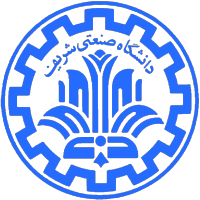

<font color=0F5298 size=7>
Final Project <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Machine Learning  <br>
<font color=696880 size=4>
Prepared by Group 47 (Armin Zeinalzadeh, Pouria Hosseini, Matin Mir)

____

# **PHASE 1**

#### **1.0. Imports**

In [1]:
import pandas as pd
import numpy as np
import math
import inflection
import seaborn as sns
import matplotlib.pyplot as plt

#### **1.1. Loading Data**

In [2]:
df_sales_raw = pd.read_csv("./train.csv", low_memory=False)
df_store_raw = pd.read_csv("./store.csv", low_memory=False)

In [3]:
# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how="left", on="Store")
df_raw.sample()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
621588    204          6  2013-12-21   7176        637     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
621588            0              0         a          a               5630.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
621588                       12.0                    2002.0       1   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
621588             40.0           2014.0  Jan,Apr,Jul,Oct

In [4]:
df1 = df_raw.copy()

In [5]:
#rename columns
cols_old = df1.columns.tolist()
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

In [6]:
df1.head()

store  day_of_week        date  sales  customers  open  promo  \
0      1            5  2015-07-31   5263        555     1      1   
1      2            5  2015-07-31   6064        625     1      1   
2      3            5  2015-07-31   8314        821     1      1   
3      4            5  2015-07-31  13995       1498     1      1   
4      5            5  2015-07-31   4822        559     1      1   

  state_holiday  school_holiday store_type assortment  competition_distance  \
0             0               1          c          a                1270.0   
1             0               1          a          a                 570.0   
2             0               1          a          a               14130.0   
3             0               1          c          c                 620.0   
4             0               1          a          a               29910.0   

   competition_open_since_month  competition_open_since_year  promo2  \
0                           9.0                       2008.0       0   
1                          11.0                       2007.0       1   
2                          12.0                       2006.0       1   
3                           9.0                       2009.0       0   
4                           4.0                       2015.0       0   

   promo2_since_week  promo2_since_year   promo_interval  
0                NaN                NaN              NaN  
1               13.0             2010.0  Jan,Apr,Jul,Oct  
2               14.0             2011.0  Jan,Apr,Jul,Oct  
3                NaN                NaN              NaN  
4                NaN                NaN              NaN

In [7]:
print("Number of Rows: {}".format(df1.shape[0]))
print("NUmber of Cols: {}".format(df1.shape[1]))

Number of Rows: 1017209
NUmber of Cols: 18


##### **1.1.1. data types**

In [8]:
df1['date'] = pd.to_datetime(df1["date"])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

##### **1.1.2. Handling Missing Values** 

In [9]:
df1.isna().mean()

store                           0.000000
day_of_week                     0.000000
date                            0.000000
sales                           0.000000
customers                       0.000000
open                            0.000000
promo                           0.000000
state_holiday                   0.000000
school_holiday                  0.000000
store_type                      0.000000
assortment                      0.000000
competition_distance            0.002597
competition_open_since_month    0.317878
competition_open_since_year     0.317878
promo2                          0.000000
promo2_since_week               0.499436
promo2_since_year               0.499436
promo_interval                  0.499436
dtype: float64

General Logic:
For columns containing date components (month, year, day, etc.), missing values are filled using the corresponding information from the main date column.

Approach:

If a date component column has NaN → Extract and fill with the relevant part from the date column

If value exists → Keep the original value

In [10]:
# competition_distance
df1["competition_distance"] = df1["competition_distance"].fillna(200000.0)

In [11]:
# competition_open_since_month
df1.competition_open_since_month = df1.apply(lambda x: x["date"].month if math.isnan(x["competition_open_since_month"]) else x["competition_open_since_month"], axis=1)

In [12]:
# competition_open_since_year
df1.competition_open_since_year = df1.apply(lambda x: x["date"].year if math.isnan(x["competition_open_since_year"]) else x["competition_open_since_year"], axis=1)

In [13]:
# promo2_since_week
df1["promo2_since_week"] = df1.apply(lambda x: x["date"].week if math.isnan(x["promo2_since_week"]) else x["promo2_since_week"], axis=1) 

In [14]:
# promo2_since_year
df1["promo2_since_year"] = df1.apply(lambda x: x["date"].year if math.isnan(x["promo2_since_year"]) else x["promo2_since_year"], axis=1)

In [15]:
# promo_interval
month_map = {1: "Jan", 2: "Fev", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

df1["promo_interval"].fillna(0, inplace=True)
df1["month_map"] = df1["date"].dt.month.map(month_map)

df1["is_promo"] = df1[["promo_interval", "month_map"]].apply(lambda x: 0 if x["promo_interval"] == 0 else 1 if x["month_map"] in x["promo_interval"].split(",") else 0, axis=1)

C:\Users\Hp\AppData\Local\Temp\ipykernel_348\770179852.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["promo_interval"].fillna(0, inplace=True)


##### **1.1.3. Change Data Types**

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [17]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype(int)
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype(int)

df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)
df1["promo2_since_year"] = df1["promo2_since_year"].astype(int)

### **1.2. Descriptive Statistical**

In [18]:
num_attributes = df1.select_dtypes(include=["int64", "float64"])
cat_attributes = df1.select_dtypes(exclude=["int64", "float64", "datetime64[ns]"])

##### **1.2.1 Numerical Attributes**

In [19]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

## Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
stats = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
stats.columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

In [20]:
stats

attributes     min       max     range         mean  \
0                          store     1.0    1115.0    1114.0   558.429727   
1                    day_of_week     1.0       7.0       6.0     3.998341   
2                          sales     0.0   41551.0   41551.0  5773.818972   
3                      customers     0.0    7388.0    7388.0   633.145946   
4                           open     0.0       1.0       1.0     0.830107   
5                          promo     0.0       1.0       1.0     0.381515   
6                 school_holiday     0.0       1.0       1.0     0.178647   
7           competition_distance    20.0  200000.0  199980.0  5935.442677   
8   competition_open_since_month     1.0      12.0      11.0     6.786849   
9    competition_open_since_year  1900.0    2015.0     115.0  2010.324840   
10                        promo2     0.0       1.0       1.0     0.500564   
11             promo2_since_week     1.0      52.0      51.0    23.619033   
12             promo2_since_year  2009.0    2015.0       6.0  2012.793297   
13                      is_promo     0.0       1.0       1.0     0.155231   

    median           std       skew    kurtosis  
0    558.0    321.908493  -0.000955   -1.200524  
1      4.0      1.997390   0.001593   -1.246873  
2   5744.0   3849.924283   0.641460    1.778375  
3    609.0    464.411506   1.598650    7.091773  
4      1.0      0.375539  -1.758045    1.090723  
5      0.0      0.485758   0.487838   -1.762018  
6      0.0      0.383056   1.677842    0.815154  
7   2330.0  12547.646829  10.242344  147.789712  
8      7.0      3.311085  -0.042076   -1.232607  
9   2012.0      5.515591  -7.235657  124.071304  
10     1.0      0.500000  -0.002255   -1.999999  
11    22.0     14.310057   0.178723   -1.184046  
12  2013.0      1.662657  -0.784436   -0.210075  
13     0.0      0.362124   1.904152    1.625796

##### **1.2.2 Categorical Attributes**

In [21]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

Sales analysis

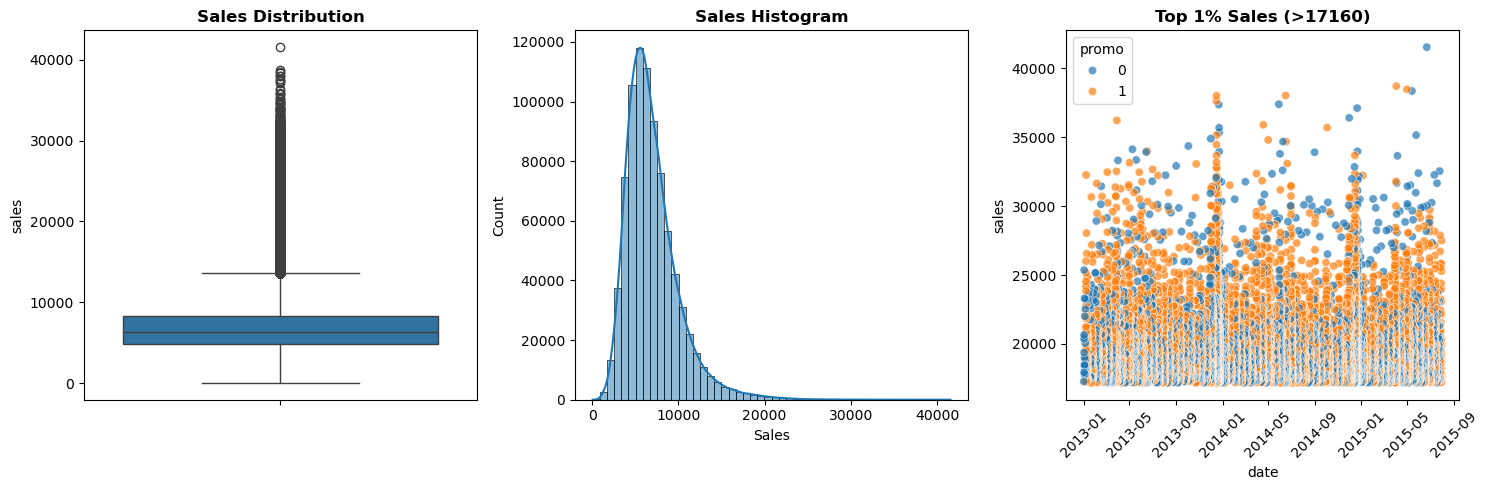

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y='sales', data=df1[df1['sales'] > 0])
plt.title('Sales Distribution', fontweight='bold')

plt.subplot(1, 3, 2)
sns.histplot(df1[df1['sales'] > 0]['sales'], bins=50, kde=True)
plt.title('Sales Histogram', fontweight='bold')
plt.xlabel('Sales')

plt.subplot(1, 3, 3)
p99 = df1['sales'].quantile(0.99)
outliers = df1[df1['sales'] > p99]
sns.scatterplot(x='date', y='sales', data=outliers, hue='promo', alpha=0.7)
plt.title(f'Top 1% Sales (>{p99:.0f})', fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('./pictures/sales_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

##### **1.2.3. Plotting Sales Trend** 

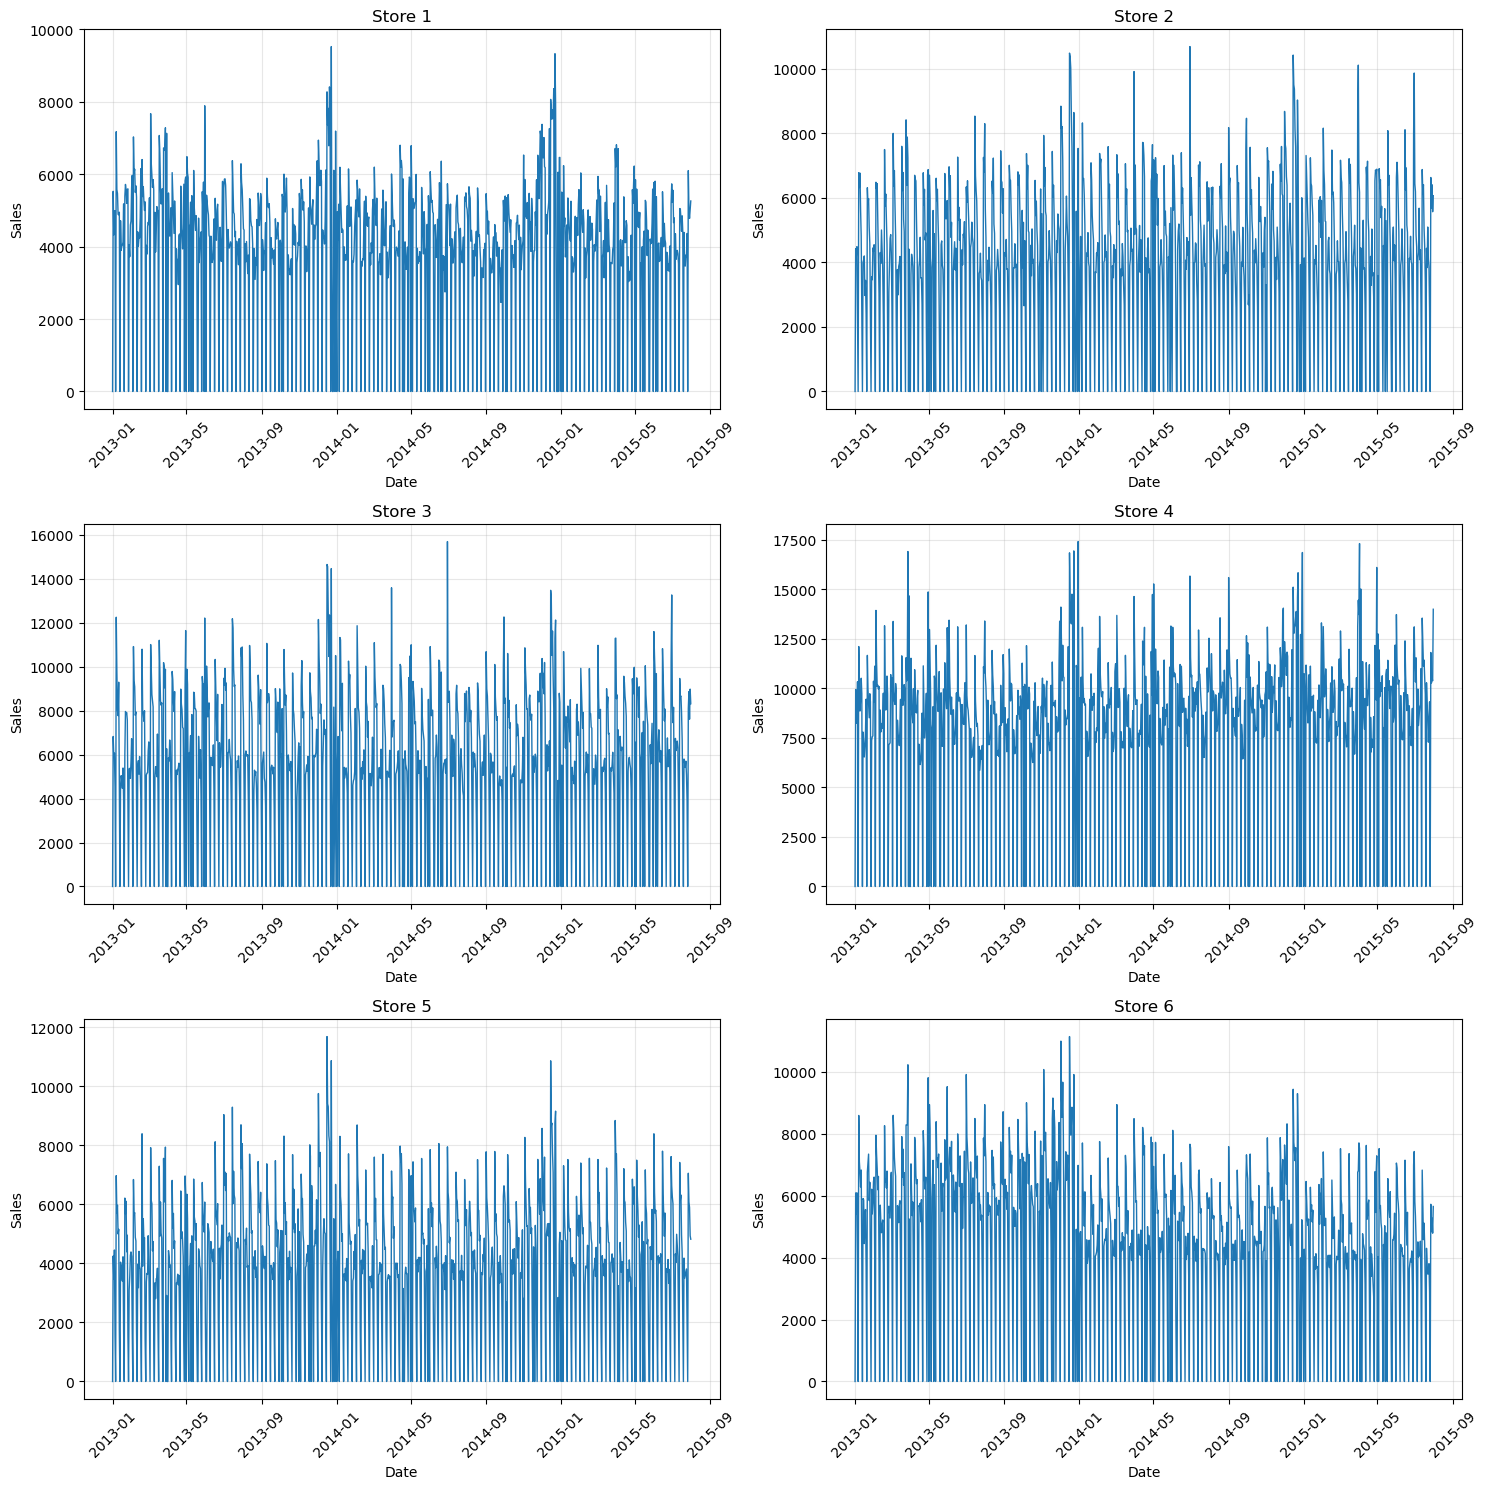

In [23]:
selected_stores = [1, 2, 3, 4, 5, 6]
df_selected = df1[df1['store'].isin(selected_stores)]

n_stores = len(selected_stores)
n_cols = 2
n_rows = (n_stores + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, store_id in enumerate(selected_stores):
    store_data = df_selected[df_selected['store'] == store_id]
    axes[i].plot(store_data['date'], store_data['sales'], linewidth=1)
    axes[i].set_title(f'Store {store_id}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Sales')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./pictures/sale_trends.png', dpi=300, bbox_inches='tight')
plt.show()

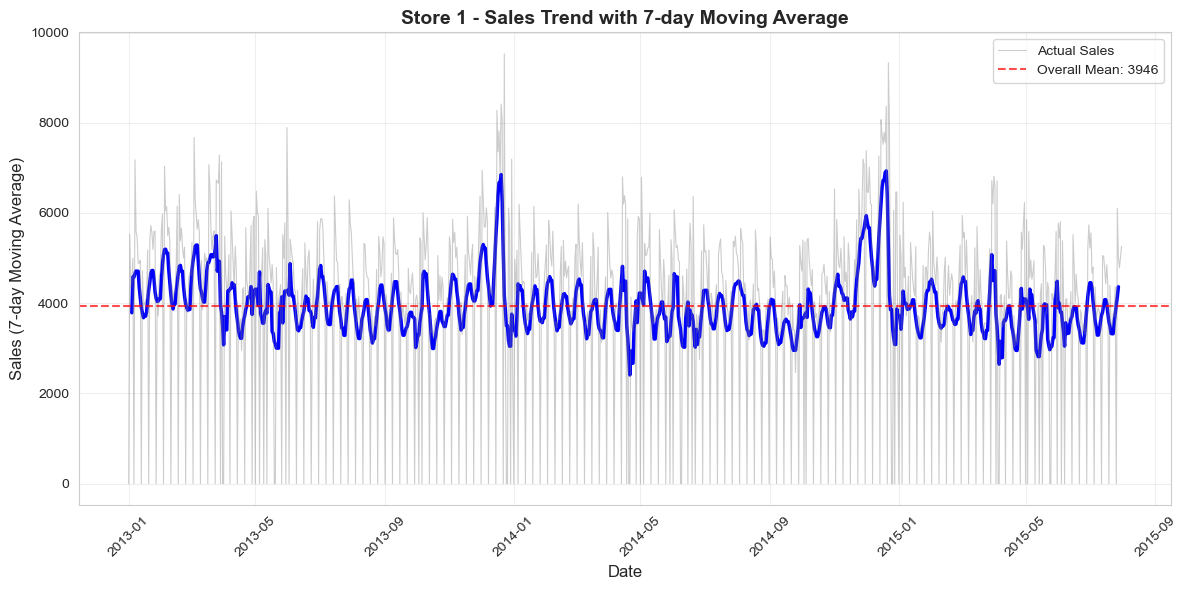

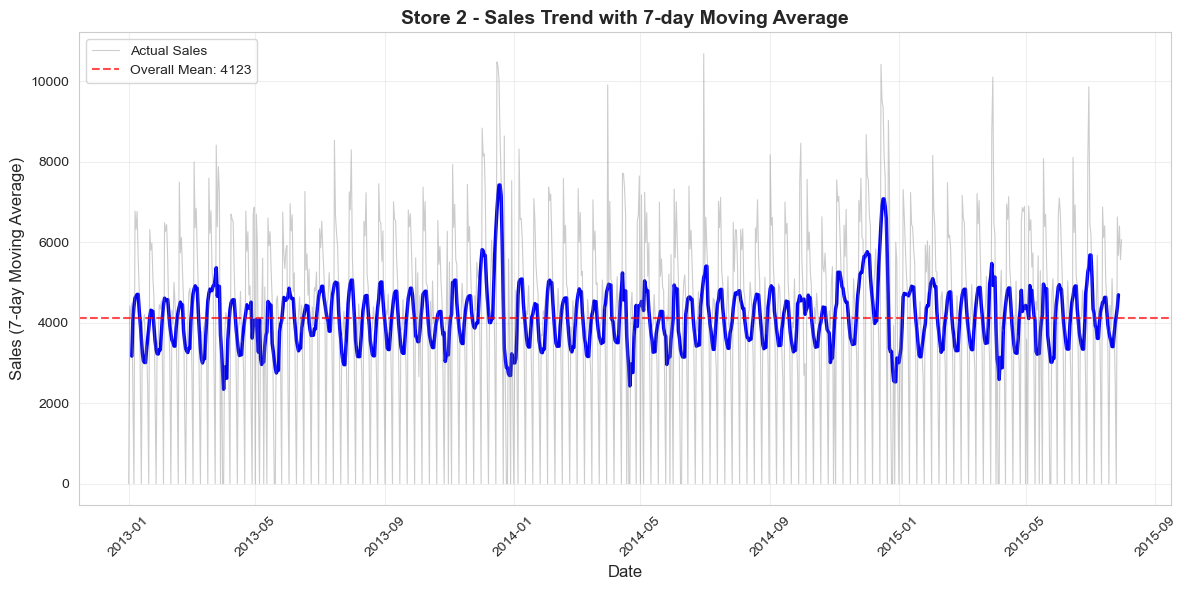

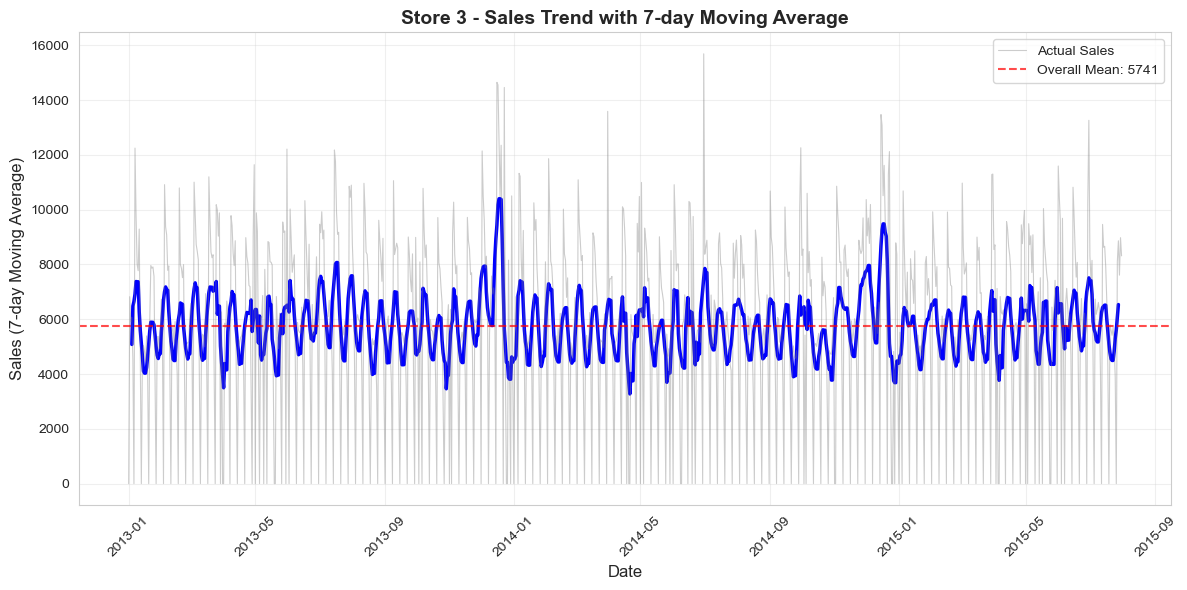

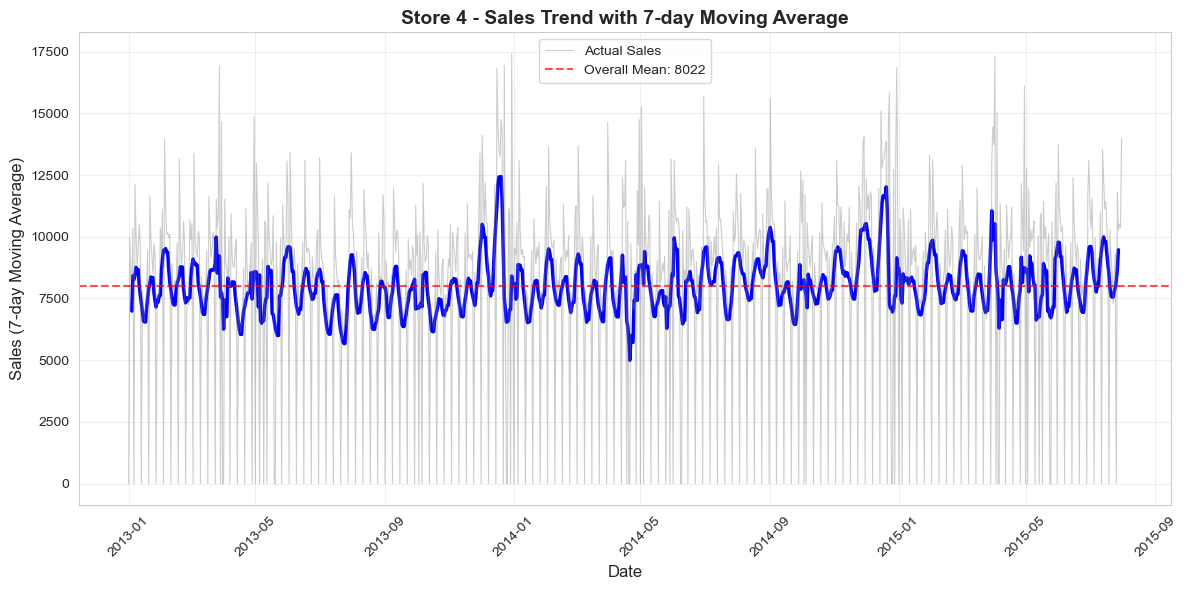

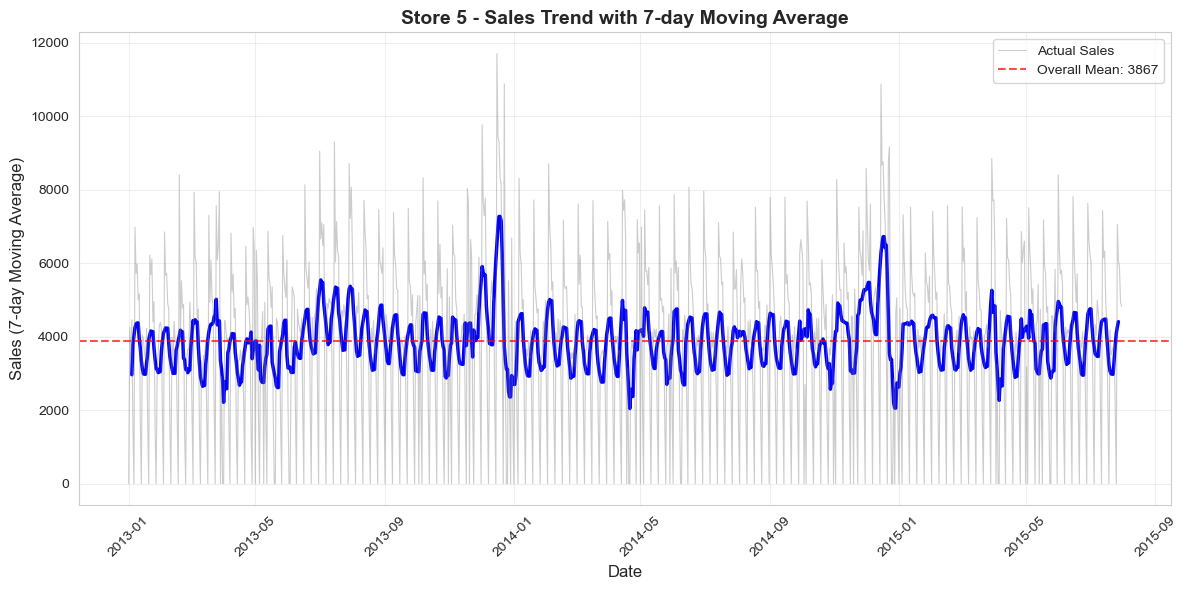

In [88]:
selected_stores = [1, 2, 3, 4, 5]
df_selected = df1[df1['store'].isin(selected_stores)]

for store_id in selected_stores:
    store_data = df_selected[df_selected['store'] == store_id].sort_values('date').copy()
    
    if len(store_data) > 0:
        store_data['sales_ma7'] = store_data['sales'].rolling(window=7, center=True).mean()
        
        plt.figure(figsize=(12, 6))
        plt.plot(store_data['date'], store_data['sales_ma7'], 
                linewidth=2.5, color='blue')
        
        plt.plot(store_data['date'], store_data['sales'], 
                linewidth=0.8, color='gray', alpha=0.4, label='Actual Sales')
        
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Sales (7-day Moving Average)', fontsize=12)
        plt.title(f'Store {store_id} - Sales Trend with 7-day Moving Average', 
                 fontsize=14, fontweight='bold')
        plt.legend(['7-day MA', 'Actual Sales'])
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        
        mean_sales = store_data['sales'].mean()
        plt.axhline(y=mean_sales, color='red', linestyle='--', 
                   alpha=0.7, label=f'Overall Mean: {mean_sales:.0f}')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig(f'./pictures/sales_trend_store{store_id}.png', dpi=300, bbox_inches='tight')
        plt.show()

##### **1.2.4. Feature Importnace Analysis**

###### **1.2.4.1 Categorical Feature's**

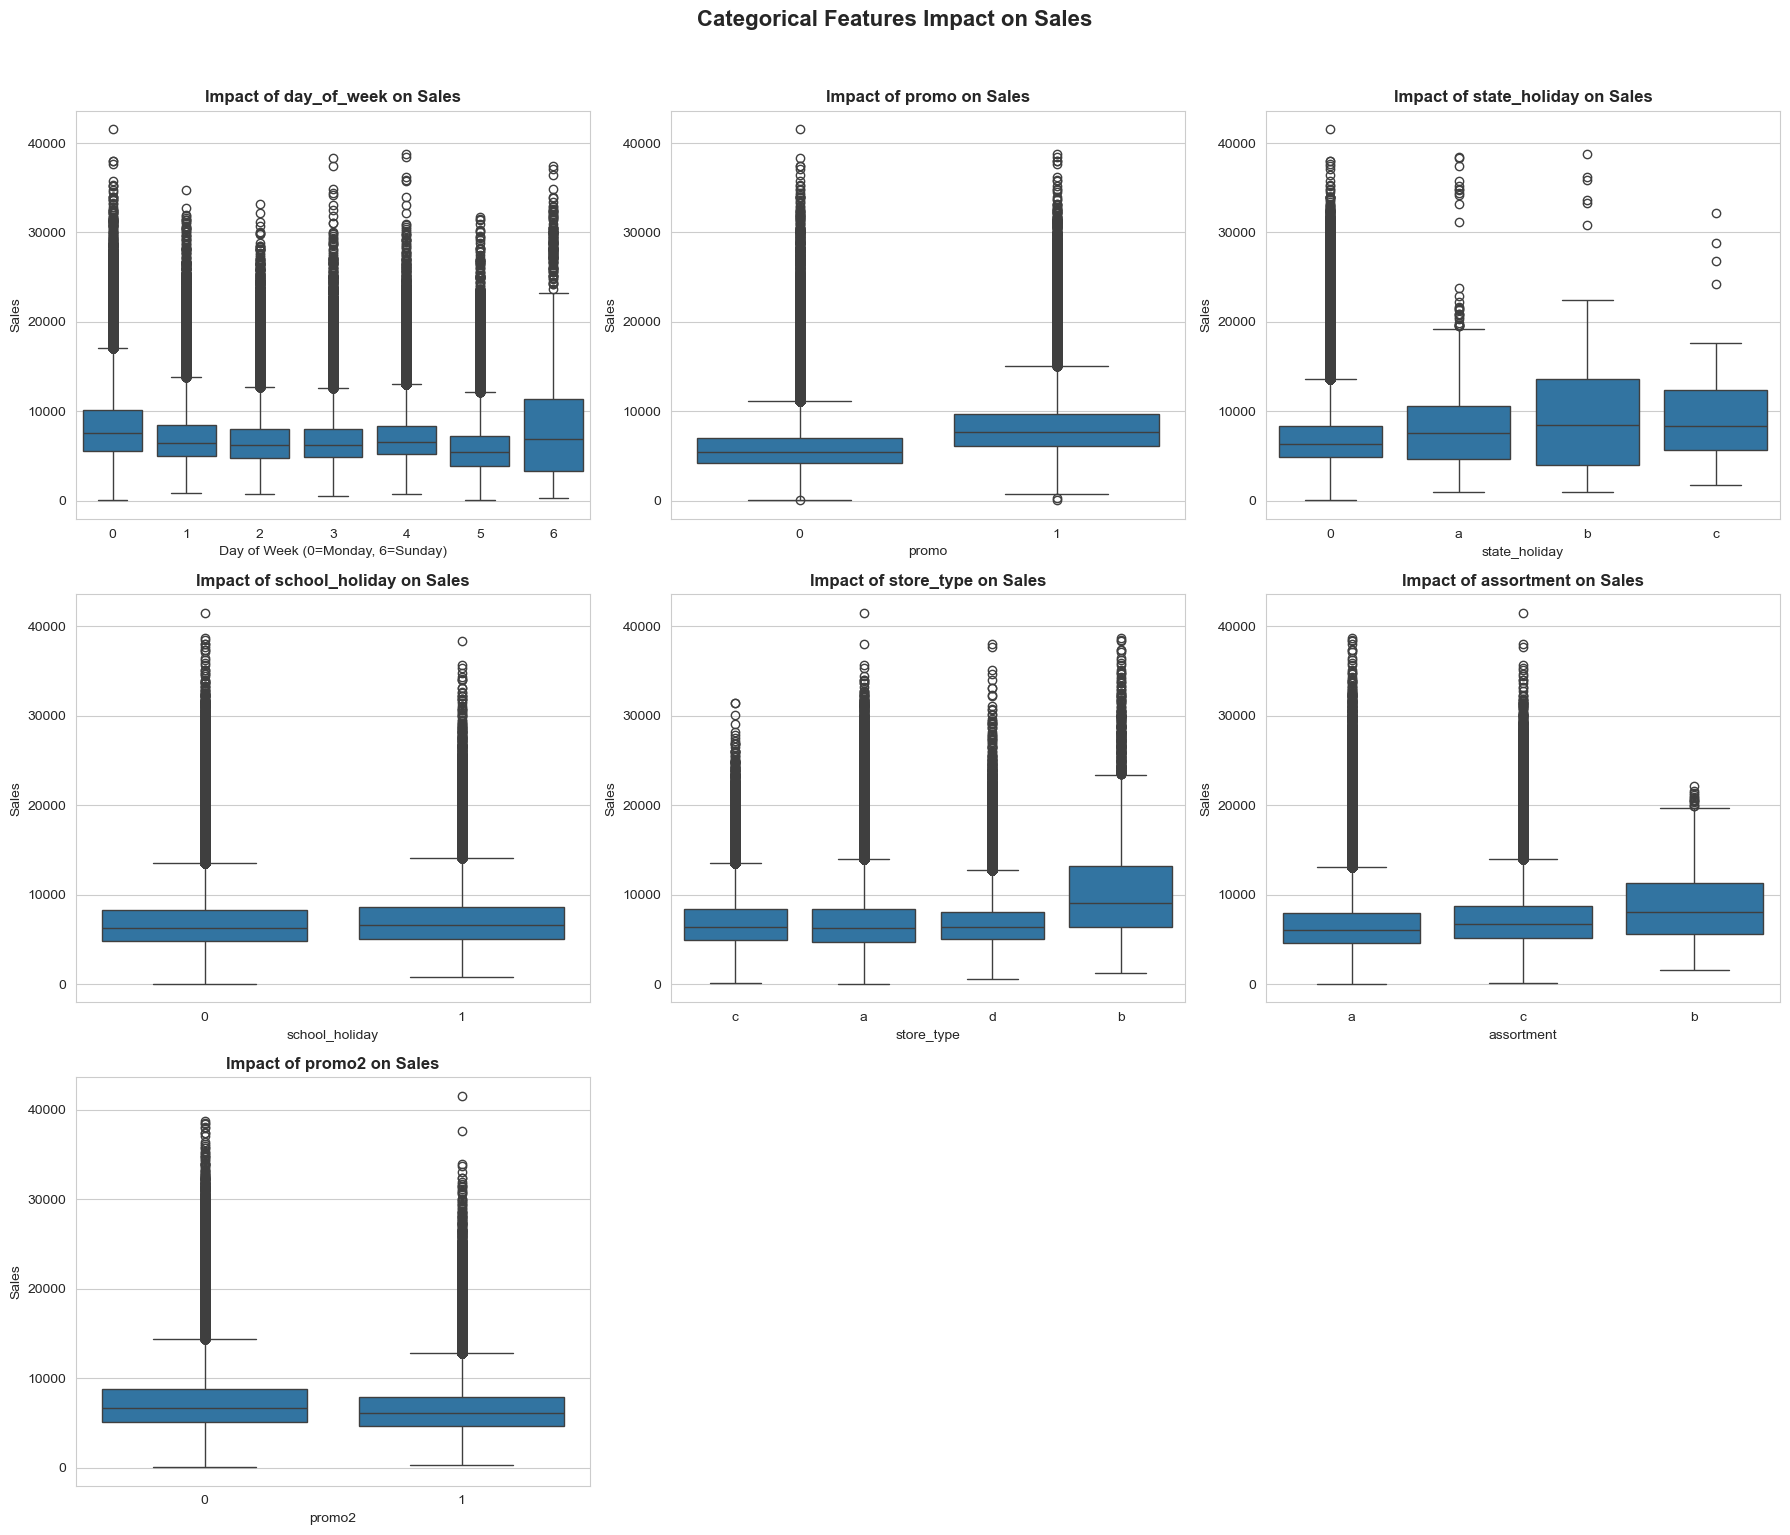

In [85]:
categorical_features = ['day_of_week', 'promo', 'state_holiday', 'school_holiday', 
                        'store_type', 'assortment', 'promo2']

n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    if feature == 'day_of_week':

        df1['day_name'] = df1['date'].dt.day_name()
        sns.boxplot(x=feature, y='sales', data=df1[df1['sales'] > 0], ax=axes[idx])
        axes[idx].set_title(f'Impact of {feature} on Sales', fontweight='bold')
        axes[idx].set_xlabel('Day of Week (0=Monday, 6=Sunday)')
    else:
        sns.boxplot(x=feature, y='sales', data=df1[df1['sales'] > 0], ax=axes[idx])
        axes[idx].set_title(f'Impact of {feature} on Sales', fontweight='bold')
        axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Sales')

for j in range(idx+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Categorical Features Impact on Sales', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('./pictures/categorical_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

State holiday values: ['0' 'a' 'b' 'c']


C:\Users\mobile-erfan\AppData\Local\Temp\ipykernel_17888\4089450022.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=holiday_data, x="state_holiday", palette="viridis")


Store type values: ['c' 'a' 'd' 'b']


C:\Users\mobile-erfan\AppData\Local\Temp\ipykernel_17888\4089450022.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="store_type", palette="magma")


Assortment values: ['a' 'c' 'b']


C:\Users\mobile-erfan\AppData\Local\Temp\ipykernel_17888\4089450022.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="assortment", palette="plasma")


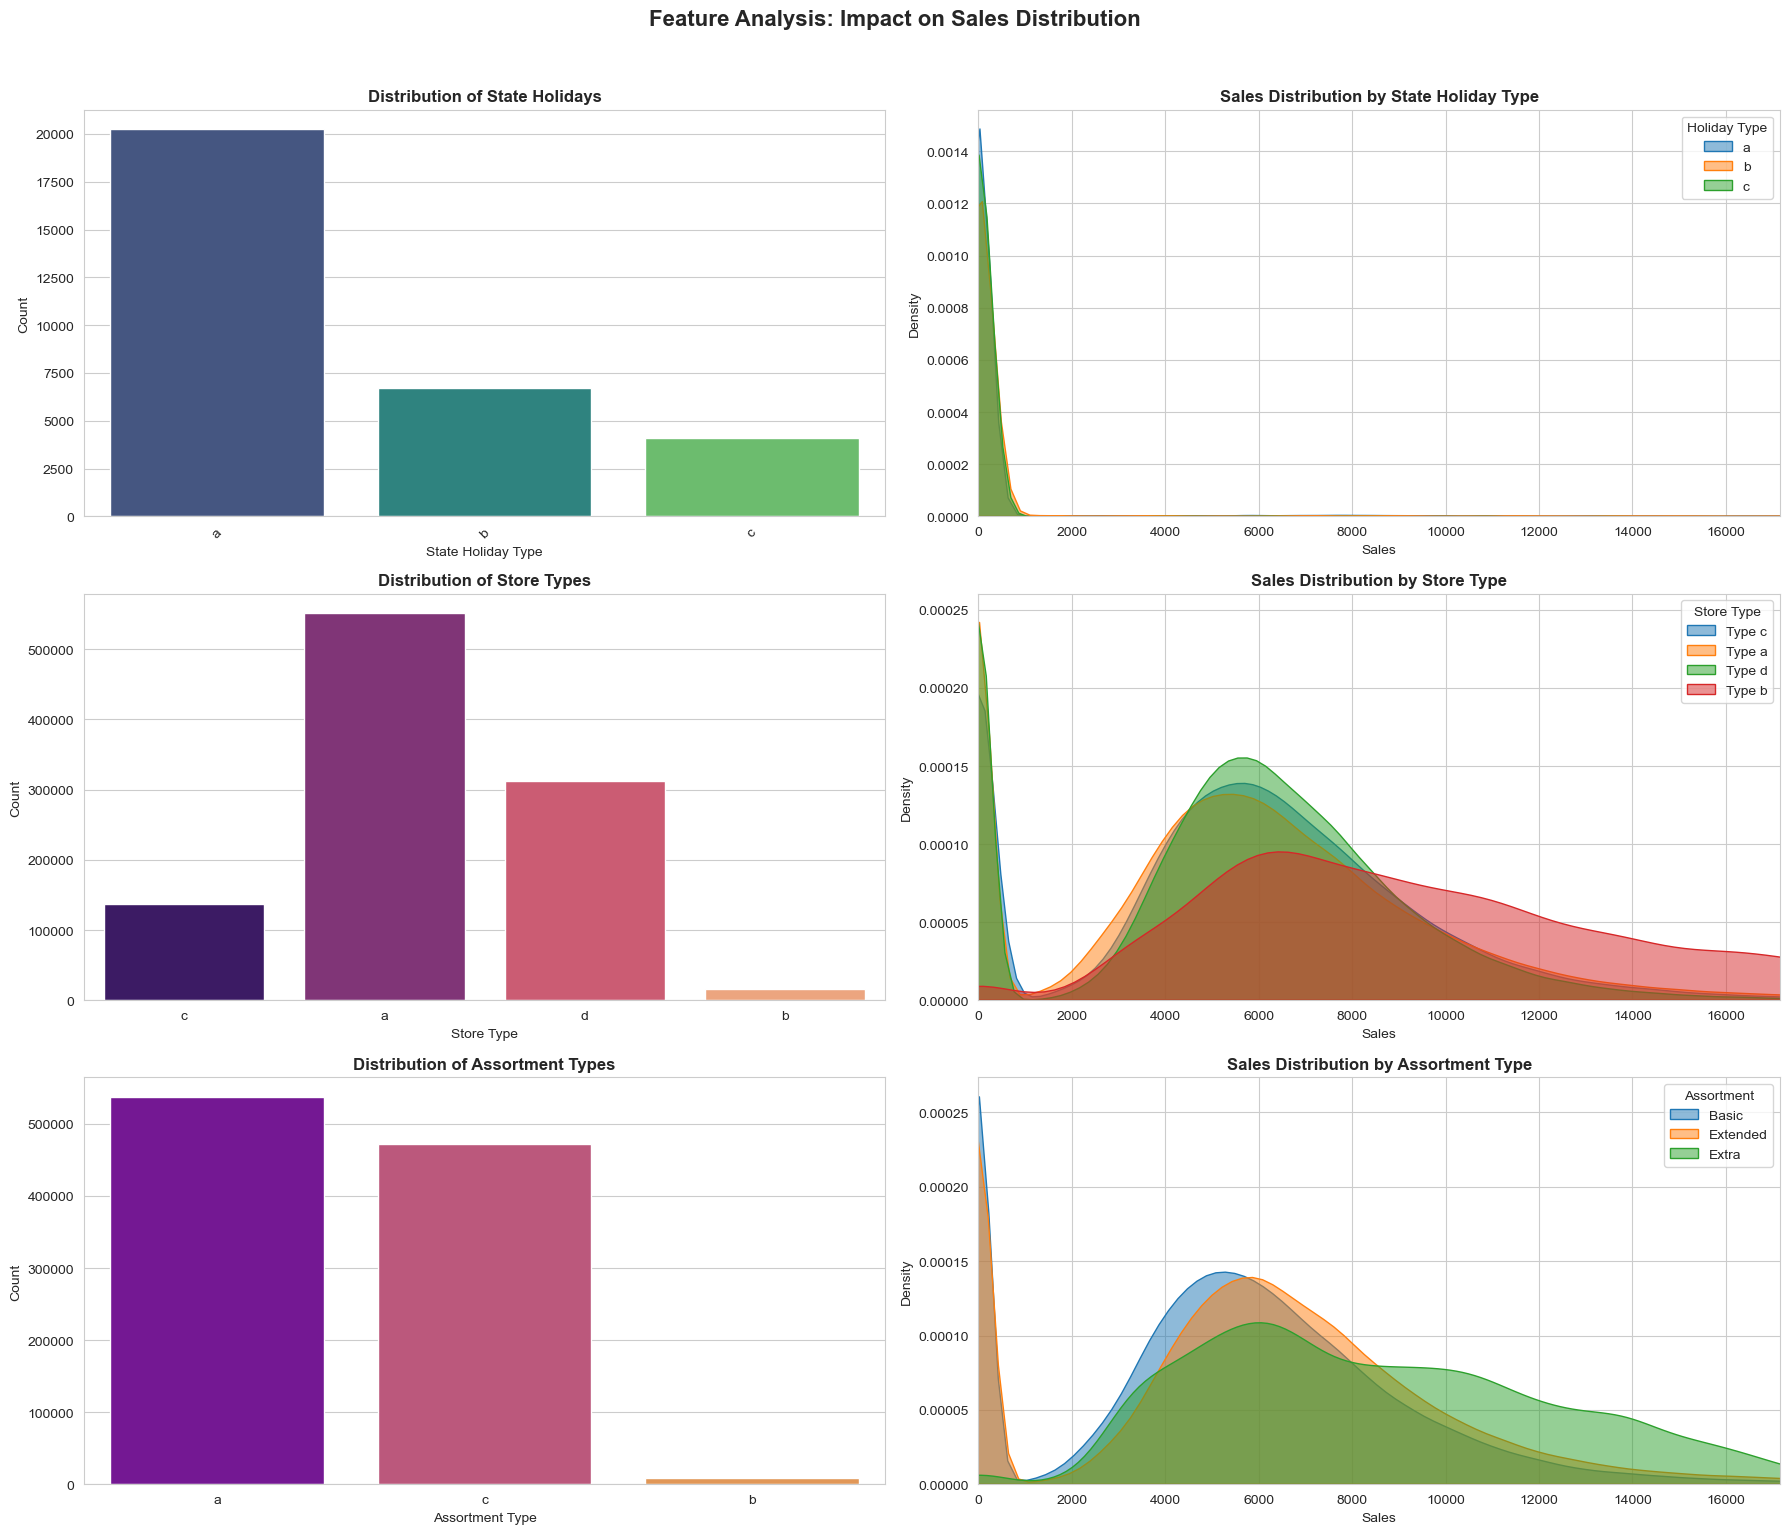

In [ ]:
plt.figure(figsize=(18, 15))
sns.set_style("whitegrid")

plt.subplot(3, 2, 1)
holiday_data = df1[df1["state_holiday"] != "0"] 

print("State holiday values:", df1["state_holiday"].unique())

sns.countplot(data=holiday_data, x="state_holiday", palette="viridis")
plt.title('Distribution of State Holidays', fontsize=12, fontweight='bold')
plt.xlabel('State Holiday Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)
holiday_types = holiday_data["state_holiday"].unique()

for holiday in holiday_types:
    subset = holiday_data[holiday_data["state_holiday"] == holiday]
    if len(subset) > 10: 
        sns.kdeplot(data=subset, x="sales", label=holiday, fill=True, alpha=0.5)

plt.title('Sales Distribution by State Holiday Type', fontsize=12, fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend(title='Holiday Type')
plt.xlim(0, df1["sales"].quantile(0.99))  

plt.subplot(3, 2, 3)
print("Store type values:", df1["store_type"].unique())

sns.countplot(data=df1, x="store_type", palette="magma")
plt.title('Distribution of Store Types', fontsize=12, fontweight='bold')
plt.xlabel('Store Type')
plt.ylabel('Count')

plt.subplot(3, 2, 4)
store_types = df1["store_type"].unique()

for store_type in store_types:
    if pd.notna(store_type):
        subset = df1[df1["store_type"] == store_type]
        if len(subset) > 10:
            sns.kdeplot(data=subset, x="sales", label=f'Type {store_type}', 
                       fill=True, alpha=0.5)

plt.title('Sales Distribution by Store Type', fontsize=12, fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend(title='Store Type')
plt.xlim(0, df1["sales"].quantile(0.99))

plt.subplot(3, 2, 5)
print("Assortment values:", df1["assortment"].unique())

sns.countplot(data=df1, x="assortment", palette="plasma")
plt.title('Distribution of Assortment Types', fontsize=12, fontweight='bold')
plt.xlabel('Assortment Type')
plt.ylabel('Count')

plt.subplot(3, 2, 6)
assortment_types = df1["assortment"].unique()

assortment_names = {
    'a': 'Basic',
    'b': 'Extra',
    'c': 'Extended'
}

for ass_type in assortment_types:
    if pd.notna(ass_type):
        subset = df1[df1["assortment"] == ass_type]
        if len(subset) > 10:
            label_name = assortment_names.get(ass_type, f'Type {ass_type}')
            sns.kdeplot(data=subset, x="sales", label=label_name, 
                       fill=True, alpha=0.5)

plt.title('Sales Distribution by Assortment Type', fontsize=12, fontweight='bold')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend(title='Assortment')
plt.xlim(0, df1["sales"].quantile(0.99))

plt.suptitle('Feature Analysis: Impact on Sales Distribution', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('./pictures/categorical.png', dpi=300, bbox_inches='tight')
plt.show()

###### **1.2.4.2 Numerical Feature's**

In [62]:
num_attributes.columns

Index(['store', 'day_of_week', 'sales', 'customers', 'open', 'promo',
       'school_holiday', 'competition_distance', 'promo2', 'is_promo'],
      dtype='object')

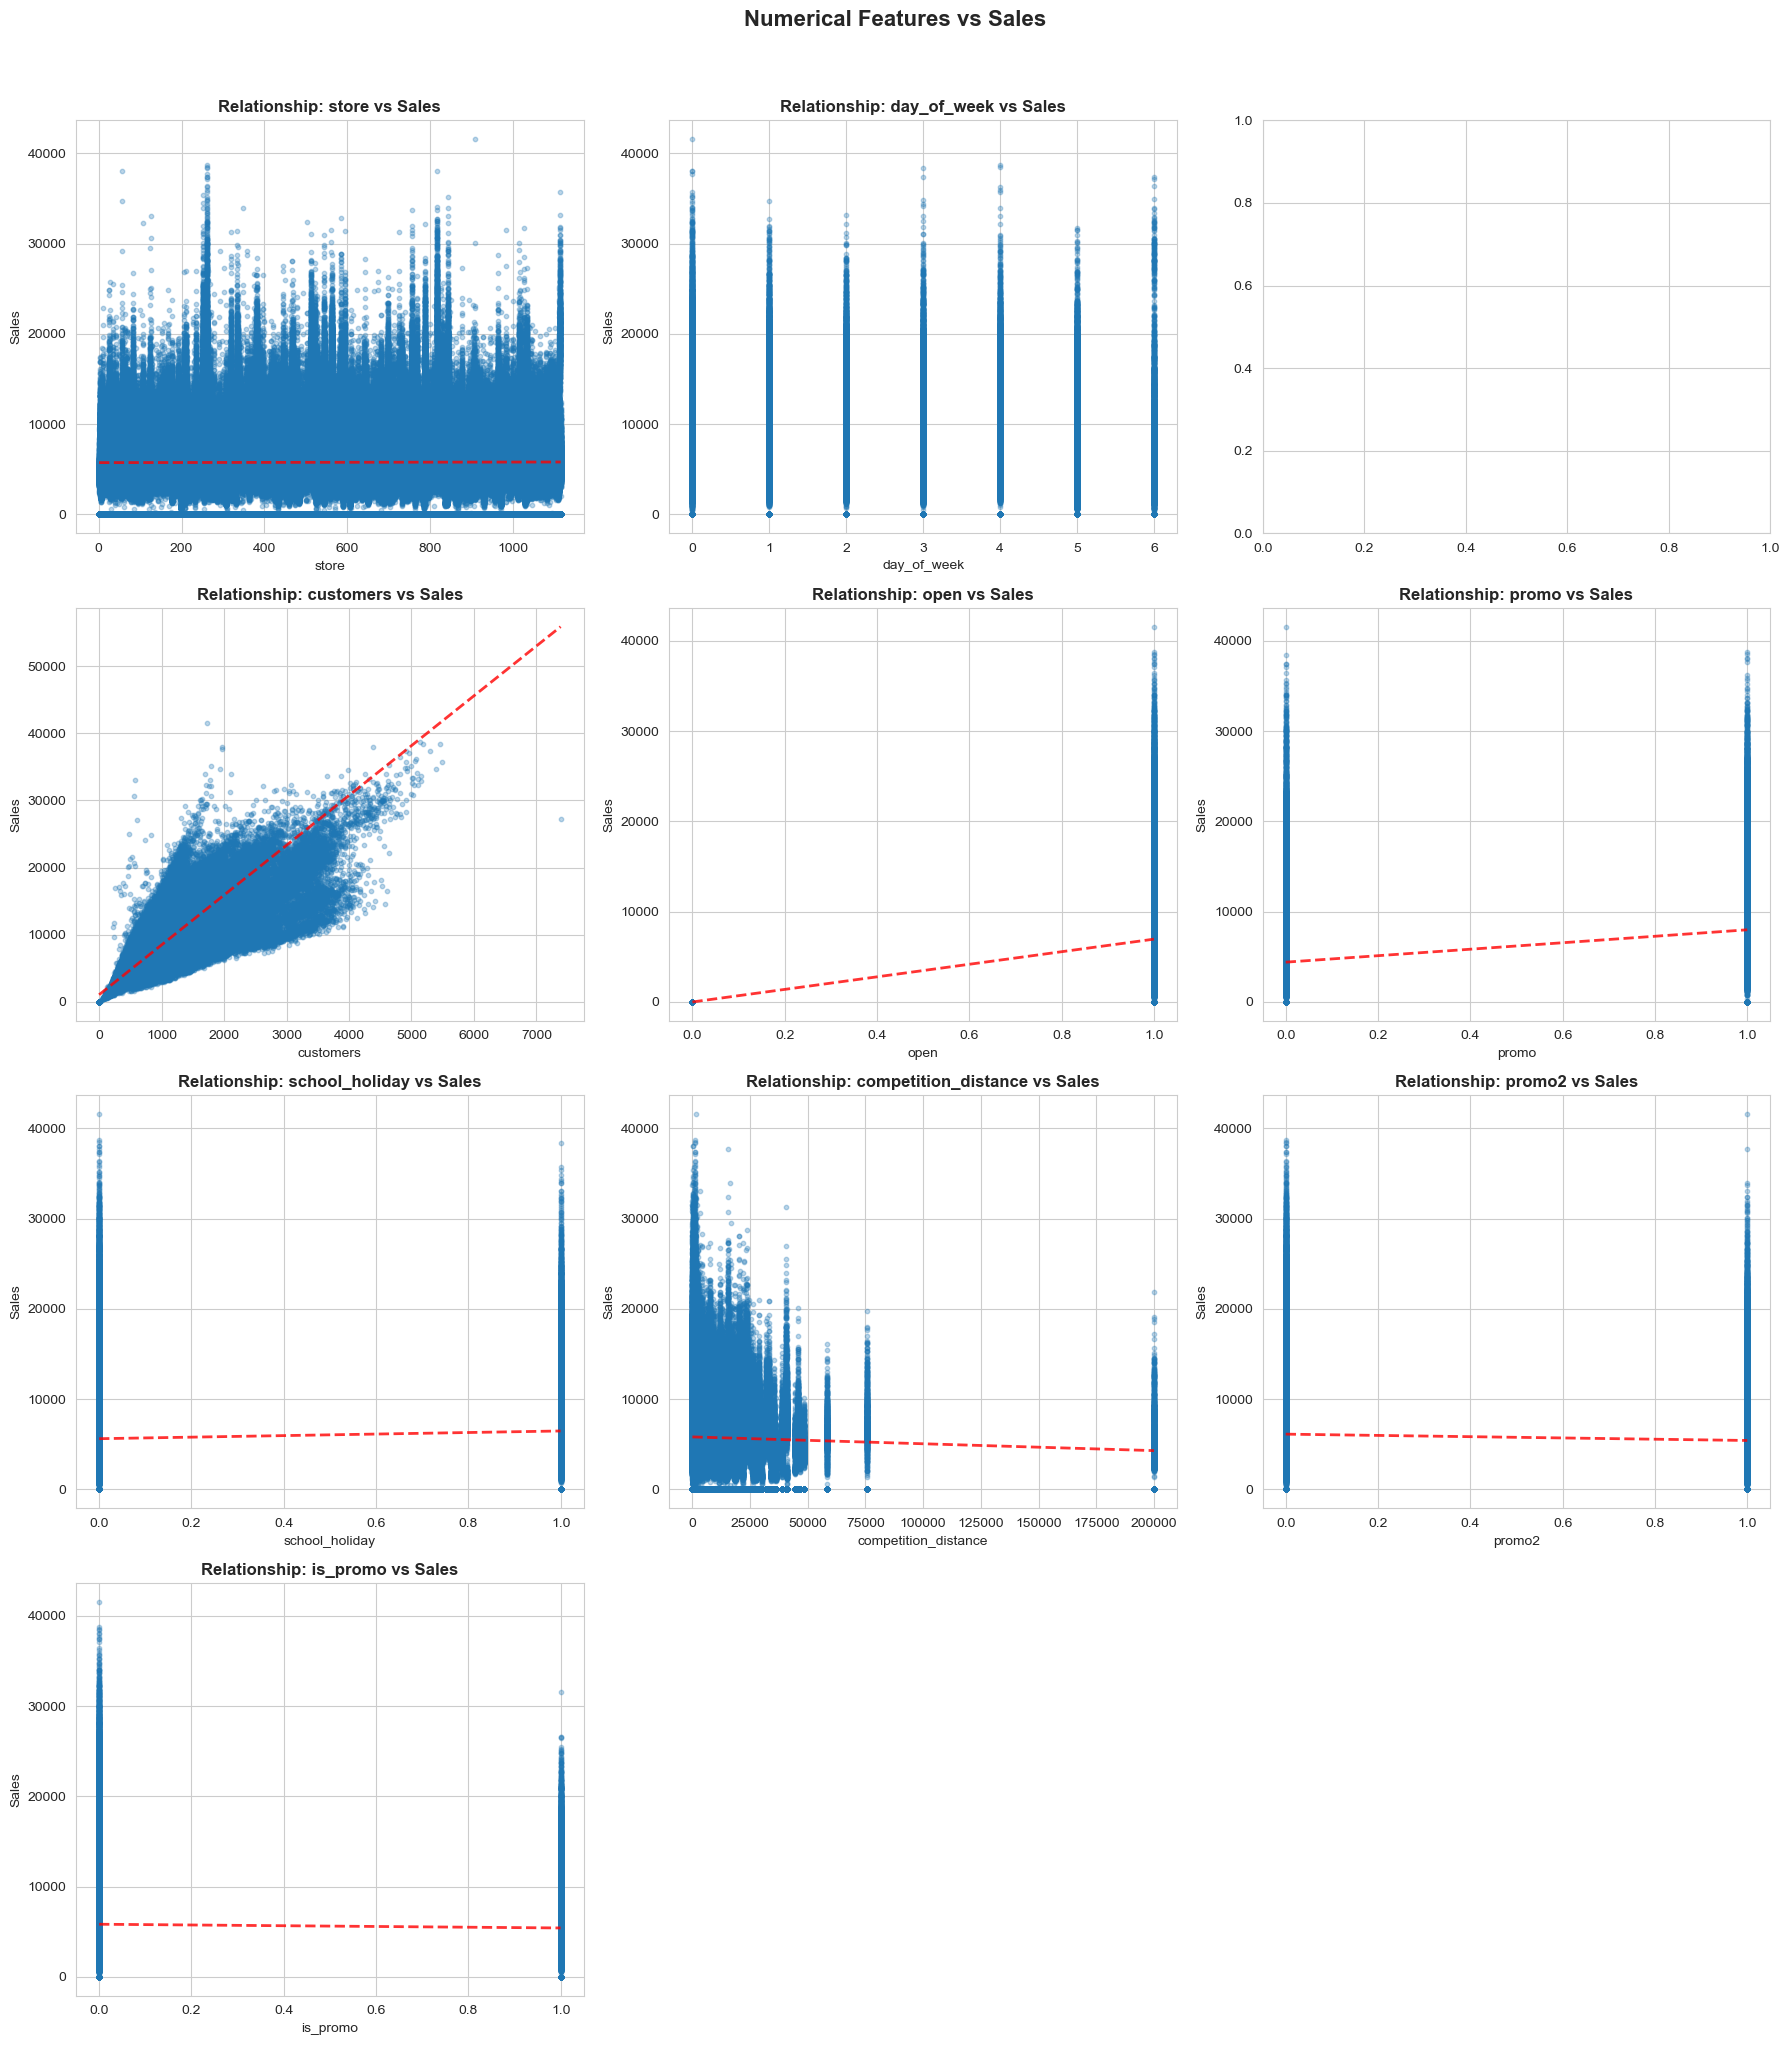

In [ ]:
numerical_features = ['store', 'day_of_week', 'sales', 'customers', 'open', 'promo',
                      'school_holiday', 'competition_distance', 'promo2', 'is_promo']

n_features = len(numerical_features)
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() 

for idx, feature in enumerate(numerical_features):
    if feature != 'sales':  
        clean_data = df1[[feature, 'sales']].dropna()
        
        axes[idx].scatter(clean_data[feature], clean_data['sales'], alpha=0.3, s=10)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Sales')
        axes[idx].set_title(f'Relationship: {feature} vs Sales', fontweight='bold')
        
        if clean_data[feature].dtype in ['int64', 'float64']:
            try:
                z = np.polyfit(clean_data[feature], clean_data['sales'], 1)
                p = np.poly1d(z)
                x_sorted = np.sort(clean_data[feature])
                axes[idx].plot(x_sorted, p(x_sorted), "r--", alpha=0.8, linewidth=2)
            except:
                pass

for j in range(idx+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Numerical Features vs Sales', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('./pictures/numerical_features.png', dpi=300, bbox_inches='tight')
plt.show()

###### **1.2.4.3 Time Feature's**

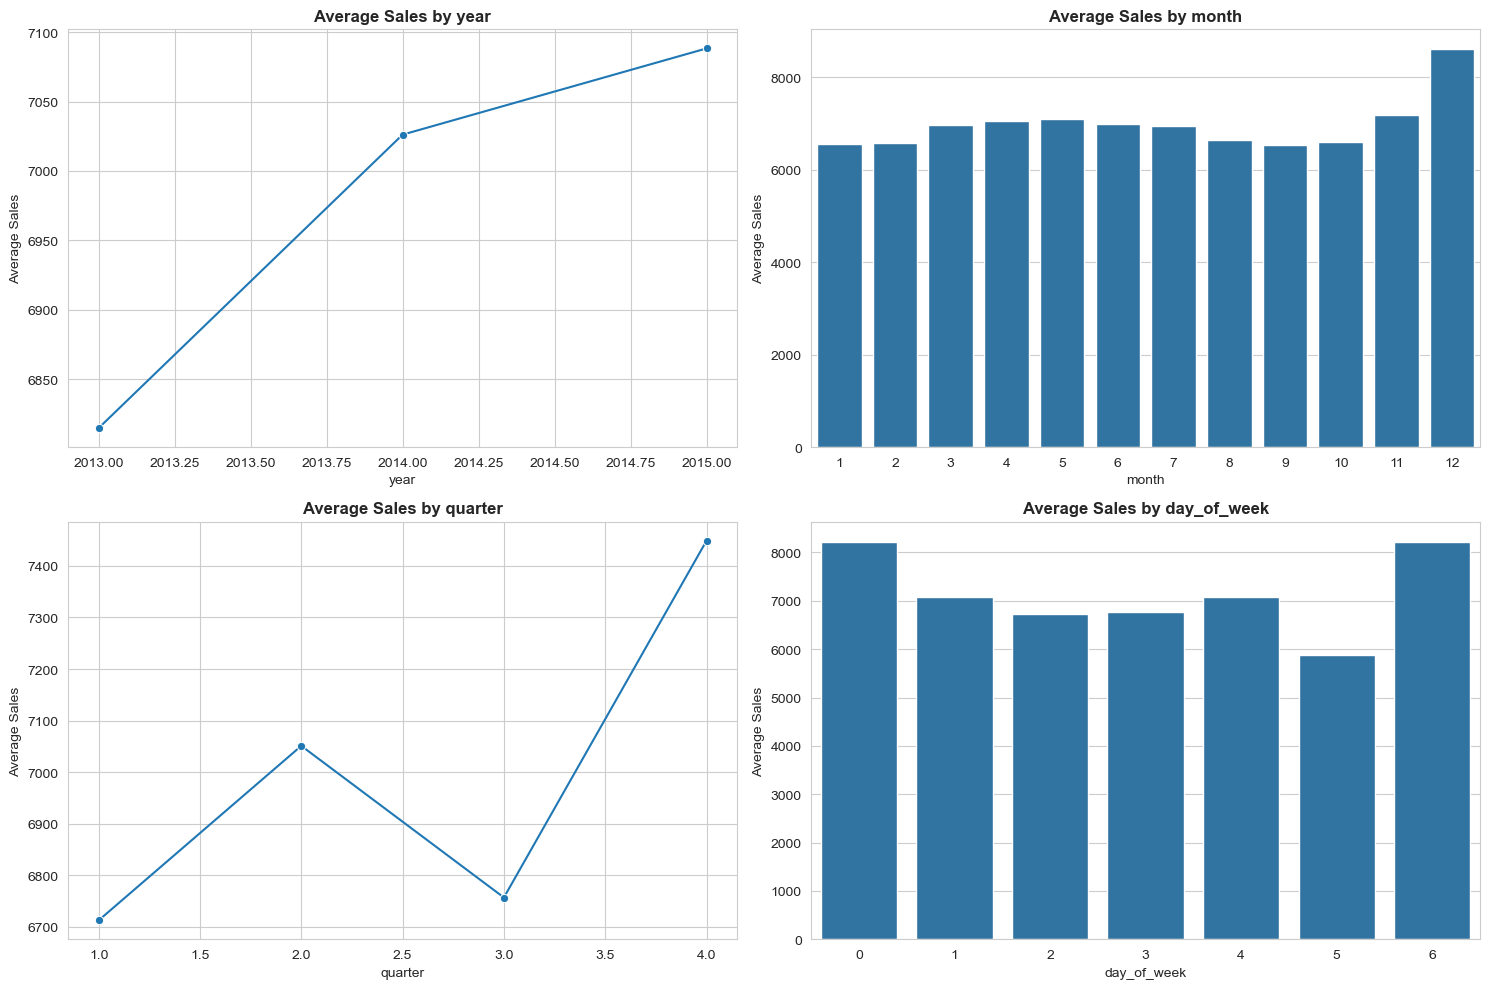

In [82]:
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['quarter'] = df1['date'].dt.quarter

time_features = ['year', 'month', 'quarter', 'day_of_week']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(time_features):
    time_avg = df1[df1['sales'] > 0].groupby(feature)['sales'].mean().reset_index()
    
    if feature in ['month', 'day_of_week']:
        sns.barplot(x=feature, y='sales', data=time_avg, ax=axes[idx])
    else:
        sns.lineplot(x=feature, y='sales', data=time_avg, marker='o', ax=axes[idx])
    
    axes[idx].set_title(f'Average Sales by {feature}', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Average Sales')

plt.tight_layout()
plt.savefig('./pictures/time_features.png', dpi=300, bbox_inches='tight')
plt.show()

###### **1.2.4.4. competition features**

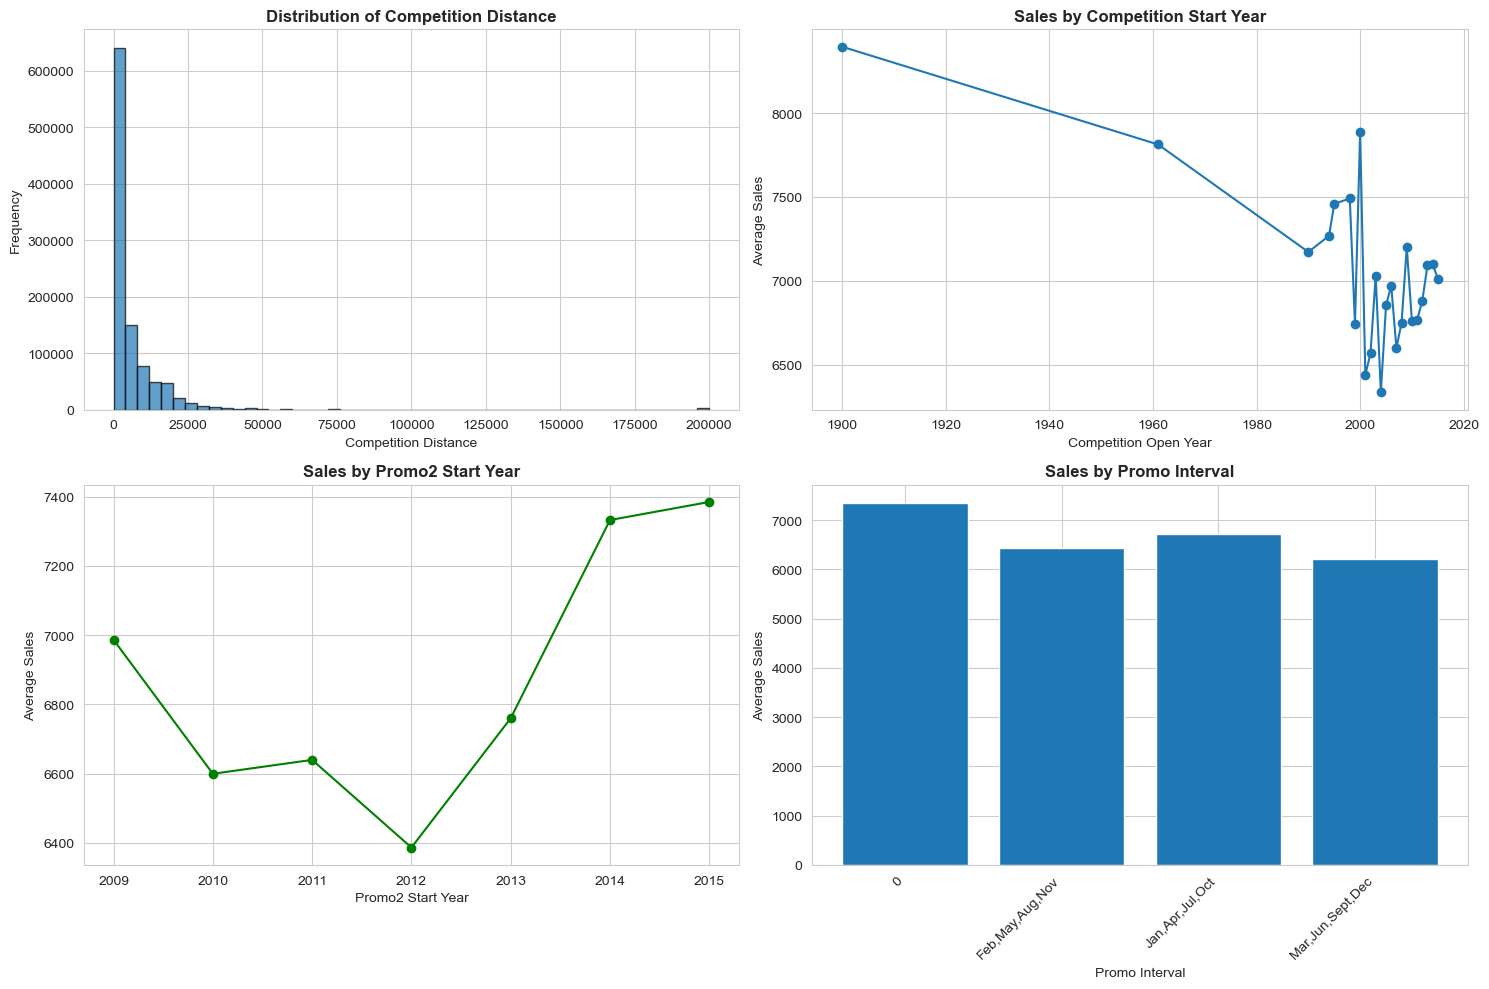

In [ ]:
competition_features = ['competition_distance', 'competition_open_since_year', 
                        'promo2_since_year', 'promo_interval']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# 1. فاصله از رقبا
axes[0].hist(df1['competition_distance'].dropna(), bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Competition Distance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Competition Distance', fontweight='bold')

# 2. سال شروع رقابت
comp_year_sales = df1[df1['sales'] > 0].groupby('competition_open_since_year')['sales'].mean().reset_index()
axes[1].plot(comp_year_sales['competition_open_since_year'], comp_year_sales['sales'], marker='o')
axes[1].set_xlabel('Competition Open Year')
axes[1].set_ylabel('Average Sales')
axes[1].set_title('Sales by Competition Start Year', fontweight='bold')

# 3. سال شروع promo2
promo2_year_sales = df1[df1['sales'] > 0].groupby('promo2_since_year')['sales'].mean().reset_index()
axes[2].plot(promo2_year_sales['promo2_since_year'], promo2_year_sales['sales'], marker='o', color='green')
axes[2].set_xlabel('Promo2 Start Year')
axes[2].set_ylabel('Average Sales')
axes[2].set_title('Sales by Promo2 Start Year', fontweight='bold')

# 4. Promo Interval - اصلاح شده
if df1['promo_interval'].notna().any():
    promo_int_sales = df1[df1['sales'] > 0].groupby('promo_interval')['sales'].mean().reset_index()
    
    # استفاده از bar به جای barh
    axes[3].bar(range(len(promo_int_sales)), promo_int_sales['sales'])
    axes[3].set_xticks(range(len(promo_int_sales)))
    axes[3].set_xticklabels(promo_int_sales['promo_interval'], rotation=45, ha='right')
    axes[3].set_xlabel('Promo Interval')
    axes[3].set_ylabel('Average Sales')
    axes[3].set_title('Sales by Promo Interval', fontweight='bold')
else:
    axes[3].text(0.5, 0.5, 'No Promo Interval Data', ha='center', va='center', transform=axes[3].transAxes)
    axes[3].set_title('Promo Interval (No Data)', fontweight='bold')

plt.tight_layout()
plt.savefig('./pictures/competition_features.png', dpi=300, bbox_inches='tight')
plt.show()

###### **1.2.4.5. interactions of features**

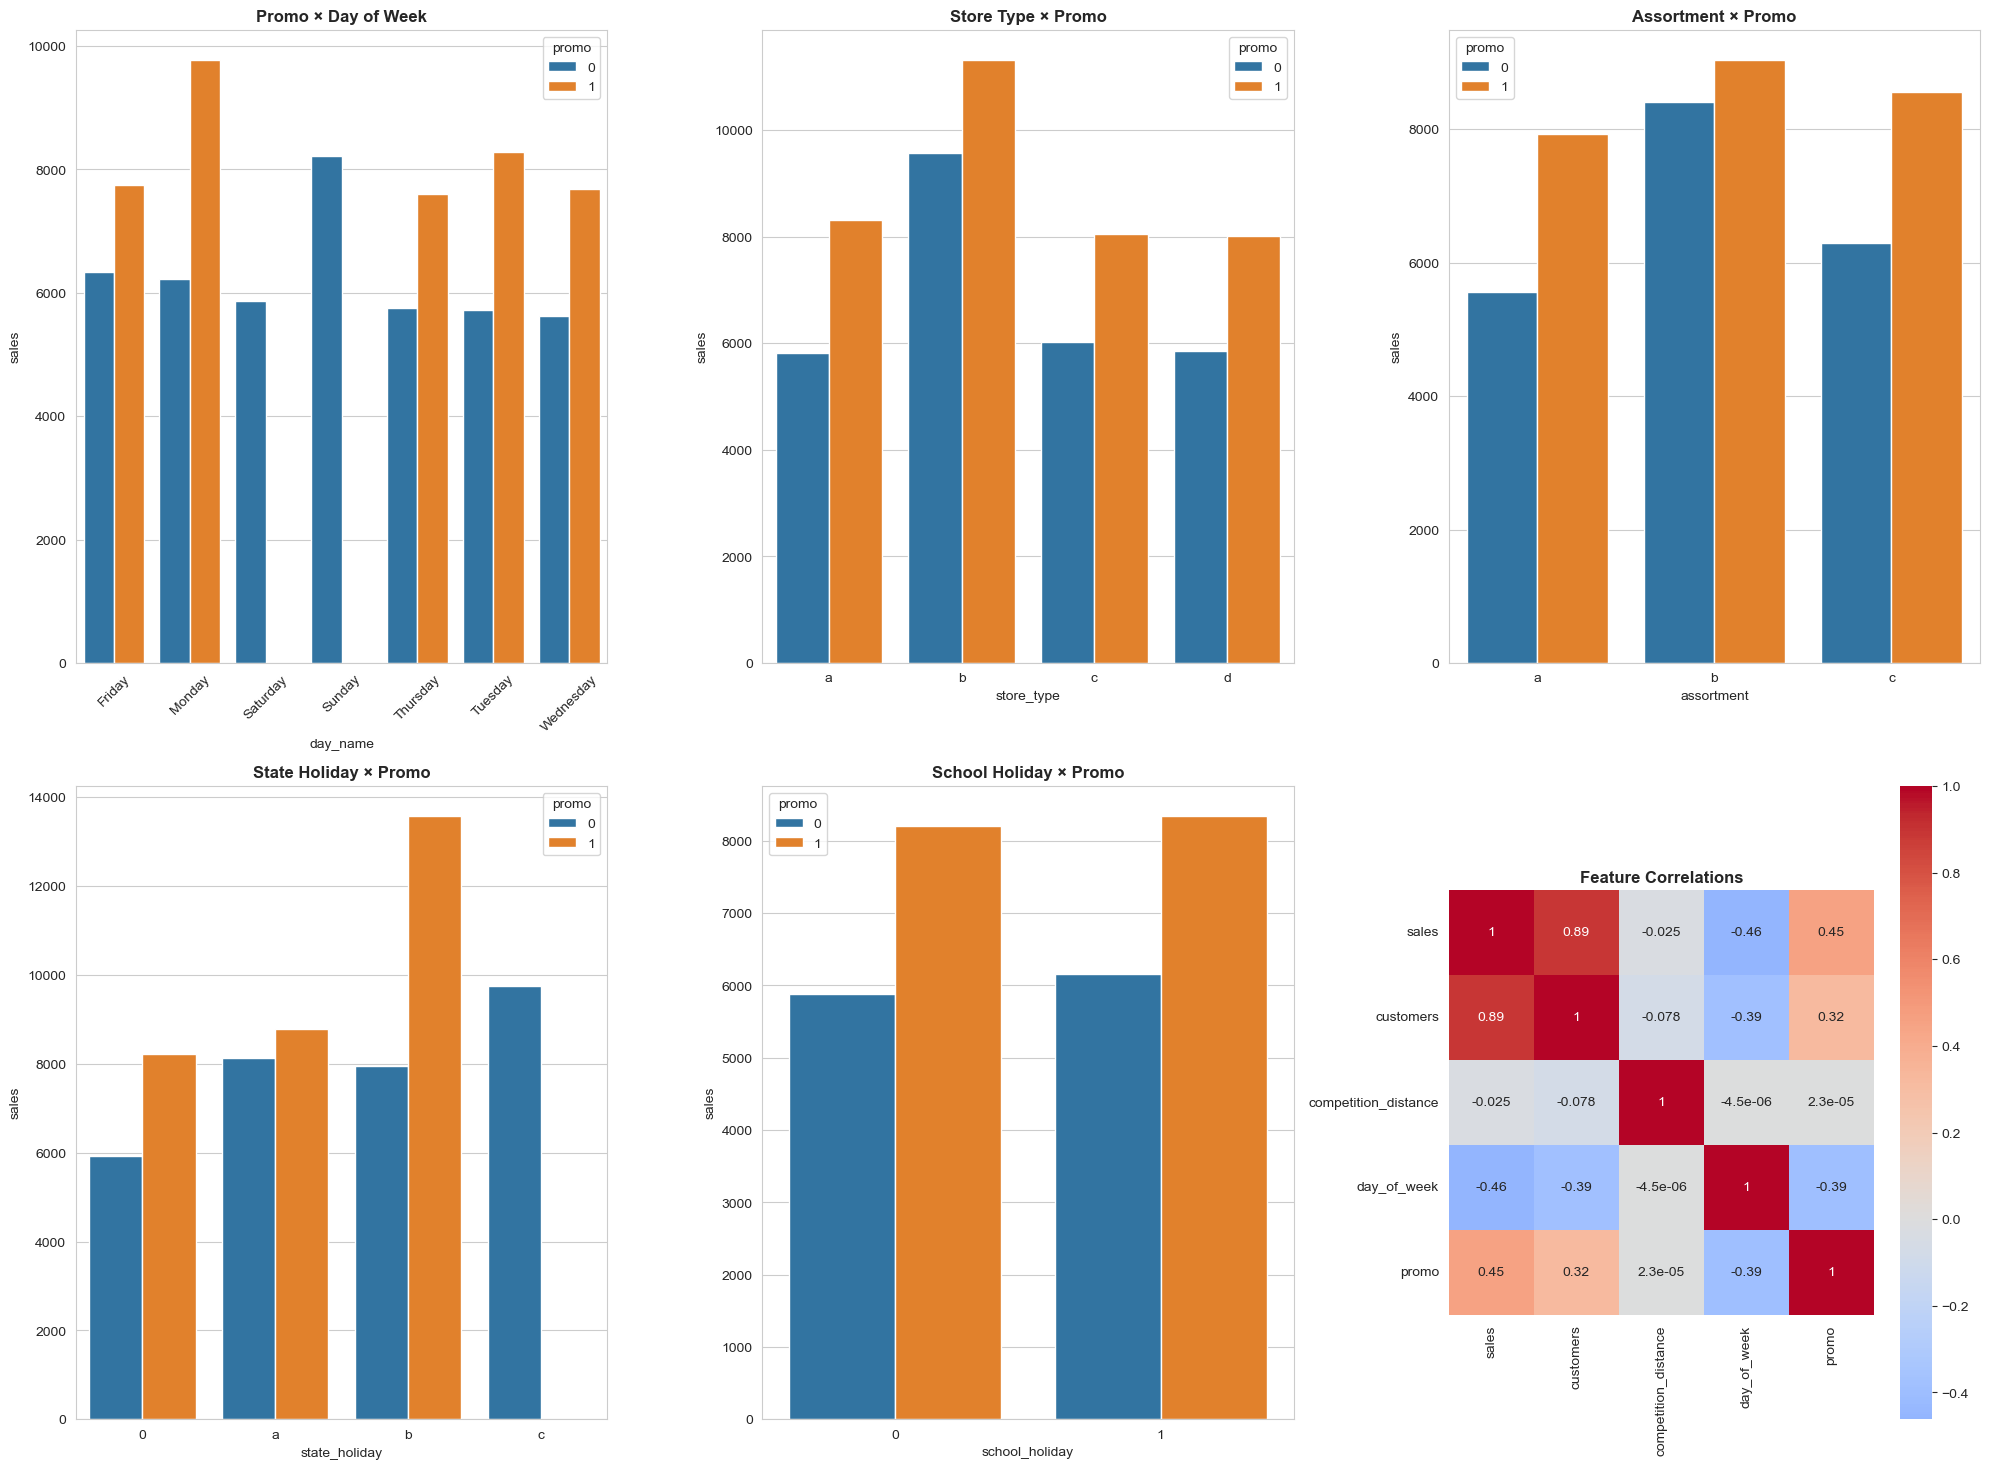

In [ ]:
plt.figure(figsize=(20, 15))

# 1. Promo × Day of Week
plt.subplot(2, 3, 1)
df1['day_name'] = df1['date'].dt.day_name()
day_promo = df1[df1['sales'] > 0].groupby(['day_name', 'promo'])['sales'].mean().reset_index()
sns.barplot(x='day_name', y='sales', hue='promo', data=day_promo)
plt.title('Promo × Day of Week', fontweight='bold')
plt.xticks(rotation=45)

# 2. Store Type × Promo
plt.subplot(2, 3, 2)
store_promo = df1[df1['sales'] > 0].groupby(['store_type', 'promo'])['sales'].mean().reset_index()
sns.barplot(x='store_type', y='sales', hue='promo', data=store_promo)
plt.title('Store Type × Promo', fontweight='bold')

# 3. Assortment × Promo
plt.subplot(2, 3, 3)
assort_promo = df1[df1['sales'] > 0].groupby(['assortment', 'promo'])['sales'].mean().reset_index()
sns.barplot(x='assortment', y='sales', hue='promo', data=assort_promo)
plt.title('Assortment × Promo', fontweight='bold')

# 4. State Holiday × Promo
plt.subplot(2, 3, 4)
holiday_promo = df1[df1['sales'] > 0].groupby(['state_holiday', 'promo'])['sales'].mean().reset_index()
sns.barplot(x='state_holiday', y='sales', hue='promo', data=holiday_promo)
plt.title('State Holiday × Promo', fontweight='bold')

# 5. School Holiday × Promo
plt.subplot(2, 3, 5)
school_promo = df1[df1['sales'] > 0].groupby(['school_holiday', 'promo'])['sales'].mean().reset_index()
sns.barplot(x='school_holiday', y='sales', hue='promo', data=school_promo)
plt.title('School Holiday × Promo', fontweight='bold')

# 6. Correlation Heatmap
plt.subplot(2, 3, 6)
numeric_cols = ['sales', 'customers', 'competition_distance', 'day_of_week', 'promo']
corr_matrix = df1[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlations', fontweight='bold')

plt.tight_layout()
plt.savefig('./pictures/interactions_barcharts.png', dpi=300, bbox_inches='tight')
plt.show()

### **1.2.5 Heatmap**

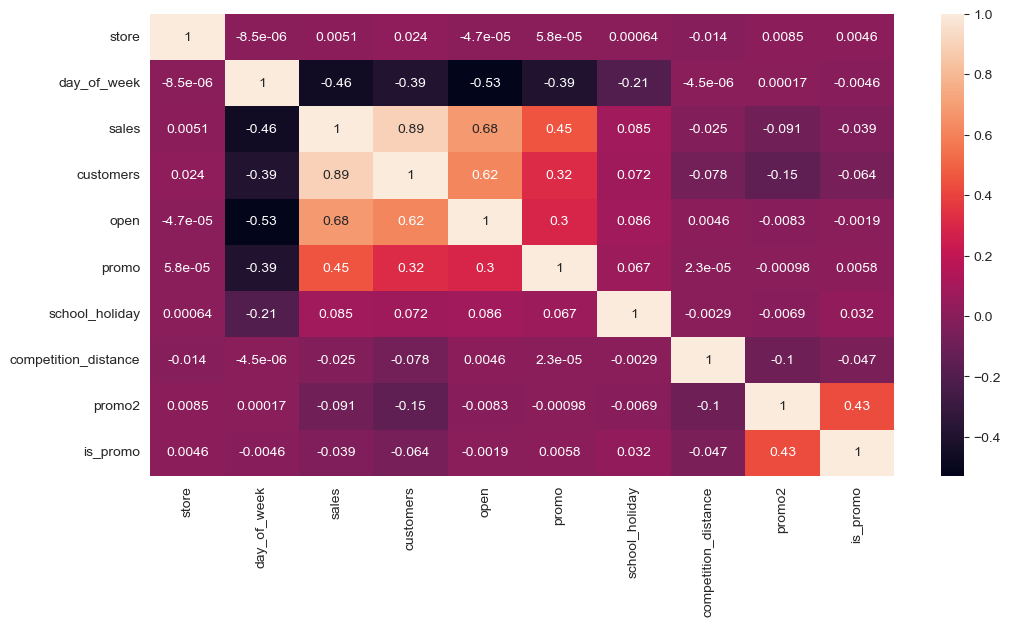

In [79]:
plt.figure(figsize=(12, 6))

correlation = num_attributes.corr()
sns.heatmap(correlation, annot=True)
plt.savefig('./pictures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# **PHASE 2**

In [22]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo'],
      dtype='object')

### **2.1 adding new features**

#### **2.1.1. Time Features**

In [23]:
df1['date'] = pd.to_datetime(df1['date'])
df1["day"] = df1['date'].dt.day
df1['month'] = df1['date'].dt.month
df1['day_of_week'] = df1['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df1['quarter'] = df1['date'].dt.quarter
df1['week_of_year'] = df1['date'].dt.isocalendar().week
df1['day_of_year'] = df1['date'].dt.dayofyear

df1['is_weekend'] = (df1['day_of_week'] >= 5).astype(int)

df1['season'] = df1['month'].map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
})

df1['near_christmas'] = ((df1['month'] == 12) & (df1['day'] >= 20)).astype(int)
df1['near_new_year'] = (((df1['month'] == 12) & (df1['day'] >= 25)) | 
                         ((df1['month'] == 1) & (df1['day'] <= 7))).astype(int)

high_sales_months = [11, 12, 7, 8]  
df1['is_high_sales_month'] = df1['month'].isin(high_sales_months).astype(int)

df1['month_abbr'] = df1['date'].dt.month_name().str[:3]

def is_in_promo_interval(row):
    if pd.notna(row['promo_interval']):
        promo_months = str(row['promo_interval']).split(',')
        return 1 if row['month_abbr'] in promo_months else 0
    return 0

df1['is_promo_month'] = df1.apply(is_in_promo_interval, axis=1)


df1['competition_since'] = pd.to_datetime(
    df1['competition_open_since_year'].astype(str) + '-' + 
    df1['competition_open_since_month'].astype(str) + '-01', 
    errors='coerce'
)
df1['days_since_competition'] = (df1['date'] - df1['competition_since']).dt.days

def create_promo2_date(row):
    if pd.notna(row['promo2_since_year']) and pd.notna(row['promo2_since_week']):
        try:
            date_str = f"{int(row['promo2_since_year'])}-W{int(row['promo2_since_week'])}-1"
            return pd.to_datetime(date_str, format='%Y-W%W-%w', errors='coerce')
        except:
            return pd.NaT
    return pd.NaT

df1['promo2_start'] = df1.apply(create_promo2_date, axis=1)
df1['days_since_promo2'] = (df1['date'] - df1['promo2_start']).dt.days

first_date = df1['date'].min()
df1['days_from_start'] = (df1['date'] - first_date).dt.days

time_features = [
    'month',
    'day_of_week', 
    'quarter',
    'week_of_year',
    'day_of_year',
    'is_weekend',
    'season',
    'near_christmas',
    'near_new_year',
    'is_high_sales_month',
    'is_promo_month',
    'days_since_competition',
    'days_since_promo2',
    'days_from_start'
]

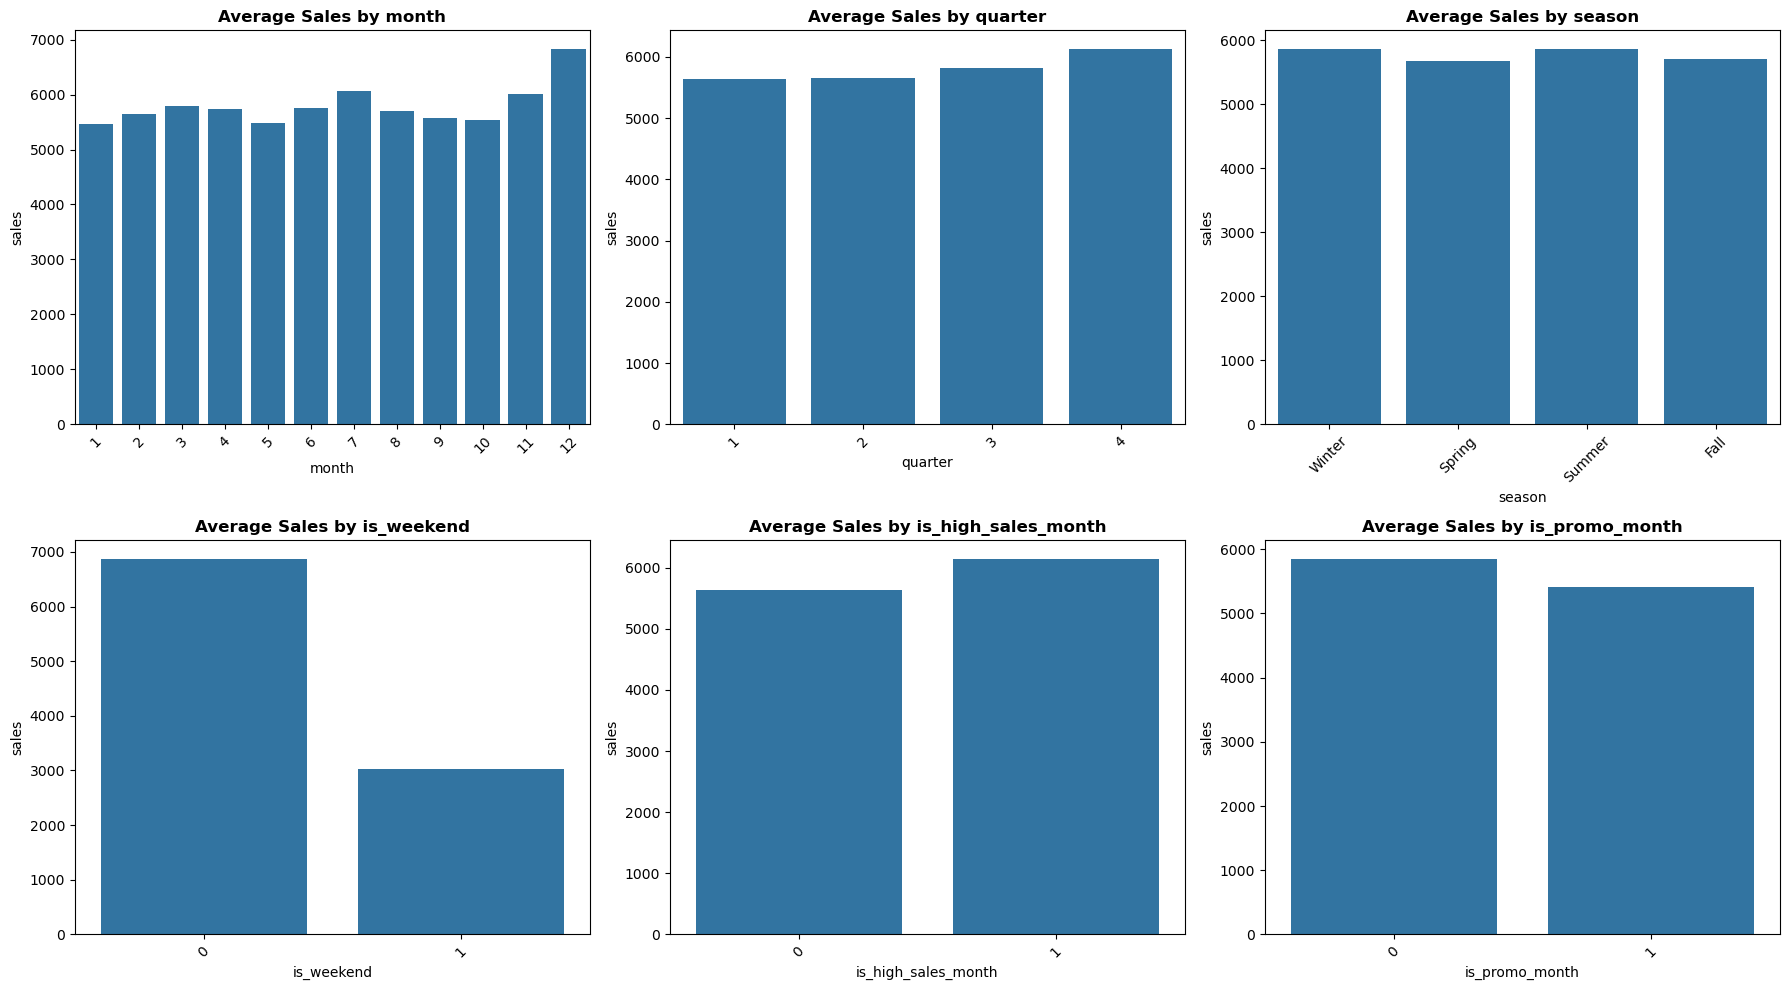

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

plot_features = ['month', 'quarter', 'season', 'is_weekend', 'is_high_sales_month', 'is_promo_month']

for idx, feature in enumerate(plot_features):
    if feature in df1.columns:
        avg_sales = df1.groupby(feature)['sales'].mean().reset_index()
        
        if feature == 'season':
            sns.barplot(x=feature, y='sales', data=avg_sales, ax=axes[idx], 
                       order=['Winter', 'Spring', 'Summer', 'Fall'])
        else:
            sns.barplot(x=feature, y='sales', data=avg_sales, ax=axes[idx])
        
        axes[idx].set_title(f'Average Sales by {feature}', fontweight='bold')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'day',
       'month', 'quarter', 'week_of_year', 'day_of_year', 'is_weekend',
       'season', 'near_christmas', 'near_new_year', 'is_high_sales_month',
       'month_abbr', 'is_promo_month', 'competition_since',
       'days_since_competition', 'promo2_start', 'days_since_promo2',
       'days_from_start'],
      dtype='object')

#### **2.1.2. Lag Features**

In [25]:
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(['store', 'date']).reset_index(drop=True)

df1['day'] = df1['date'].dt.day
df1['month'] = df1['date'].dt.month
df1['day_of_week'] = df1['date'].dt.dayofweek

# 1. Moving average 7
df1['sales_ma7'] = df1.groupby('store')['sales'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# 2. Moving average 30
df1['sales_ma30'] = df1.groupby('store')['sales'].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)

# 3. previous day sale
df1['sales_lag1'] = df1.groupby('store')['sales'].shift(1)

# 4. previous week sale
df1['sales_lag7'] = df1.groupby('store')['sales'].shift(7)

# 5. Sd 7
df1['sales_std7'] = df1.groupby('store')['sales'].transform(
    lambda x: x.rolling(window=7, min_periods=1).std().fillna(0)
)

# 6. sales to ma7 ratio
df1['sales_to_ma7_ratio'] = df1['sales'] / df1['sales_ma7'].replace(0, np.nan)
df1['sales_to_ma7_ratio'] = df1['sales_to_ma7_ratio'].fillna(1).replace([np.inf, -np.inf], 1)

# 7. sales per customer
if 'customers' in df1.columns:
    df1['sales_per_customer'] = df1['sales'] / df1['customers'].replace(0, np.nan)
    df1['sales_per_customer'] = df1['sales_per_customer'].fillna(df1['sales_per_customer'].median())

In [26]:
important_features = ['sales_ma7', 'sales_ma30', 'sales_lag1', 'sales_lag7', 'sales_std7', 'sales_to_ma7_ratio']
if 'sales_per_customer' in df1.columns:
    important_features.append('sales_per_customer')

display_cols = ['store', 'date', 'sales'] + important_features
print(df1[display_cols].head(10).to_string())

   store       date  sales    sales_ma7   sales_ma30  sales_lag1  sales_lag7   sales_std7  sales_to_ma7_ratio  sales_per_customer
0      1 2013-01-01      0     0.000000     0.000000         NaN         NaN     0.000000            1.000000            9.250000
1      1 2013-01-02   5530  2765.000000  2765.000000         0.0         NaN  3910.300500            2.000000            8.278443
2      1 2013-01-03   4327  3285.666667  3285.666667      5530.0         NaN  2908.351137            1.316932            7.486159
3      1 2013-01-04   4486  3585.750000  3585.750000      4327.0         NaN  2449.327306            1.251063            7.247173
4      1 2013-01-05   4997  3868.000000  3868.000000      4486.0         NaN  2213.081223            1.291882            7.869291
5      1 2013-01-06      0  3223.333333  3223.333333      4997.0         NaN  2532.144045            0.000000            9.250000
6      1 2013-01-07   7176  3788.000000  3788.000000         0.0         NaN  2752.283961 

In [27]:
# correlation of lag features and sales
for feature in important_features:
    if feature in df1.columns and feature != 'sales':
        corr = df1[feature].corr(df1['sales'])
        if pd.notna(corr):
            print(f"  {feature}: {corr:.3f}")

  sales_ma7: 0.576
  sales_ma30: 0.576
  sales_lag1: 0.278
  sales_lag7: 0.675
  sales_std7: 0.460
  sales_to_ma7_ratio: 0.745
  sales_per_customer: 0.168


### **2.2. Time-Based train, val, test Split**

In [28]:
df1 = df1.sort_values('date')

# Calculate split indices
train_size = int(0.7 * len(df1))
val_size = int(0.2 * len(df1))

train = df1.iloc[:train_size]
val = df1.iloc[train_size:train_size + val_size]
test = df1.iloc[train_size + val_size:]

print(f"Train: {train.shape} ({train['date'].min()} to {train['date'].max()})")
print(f"Val: {val.shape} ({val['date'].min()} to {val['date'].max()})")
print(f"Test: {test.shape} ({test['date'].min()} to {test['date'].max()})")

Train: (712046, 44) (2013-01-01 00:00:00 to 2014-10-19 00:00:00)
Val: (203441, 44) (2014-10-19 00:00:00 to 2015-05-01 00:00:00)
Test: (101722, 44) (2015-05-01 00:00:00 to 2015-07-31 00:00:00)


### **2.3. Standardization**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
numerical_cols = [
    'sales', 'customers', 'competition_distance', 
    'days_since_competition', 'days_since_promo2', 'days_from_start',
    'sales_ma7', 'sales_ma30', 'sales_lag1', 'sales_lag7', 
    'sales_std7', 'sales_to_ma7_ratio', 'sales_per_customer'
]
numerical_cols = [col for col in numerical_cols if col in train.columns]


# Fit scaler ONLY on training data
scaler = StandardScaler()
scaler.fit(train[numerical_cols])

# Transform train, val, test
train_scaled = train.copy()
val_scaled = val.copy()
test_scaled = test.copy()

train_scaled[numerical_cols] = scaler.transform(train[numerical_cols])
val_scaled[numerical_cols] = scaler.transform(val[numerical_cols])
test_scaled[numerical_cols] = scaler.transform(test[numerical_cols])

print(f"Train mean (first col): {train_scaled[numerical_cols[0]].mean():.4f}")
print(f"Val mean (first col)  : {val_scaled[numerical_cols[0]].mean():.4f}")
print(f"Test mean (first col) : {test_scaled[numerical_cols[0]].mean():.4f}")

Train mean (first col): 0.0000
Val mean (first col)  : 0.0897
Test mean (first col) : 0.0814


# **PHASE 5**

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

### **LSTM + OPTUNA**

Using features: ['sales', 'customers', 'sales_lag1', 'sales_lag7', 'sales_ma7', 'sales_ma30', 'sales_std7', 'sales_per_customer', 'day_of_week', 'day', 'month', 'days_from_start']
Target: sales


[I 2026-02-25 03:02:44,949] A new study created in memory with name: balanced_lstm_cpu


Train tune subset: 100,000 rows
Val tune subset:   40,000 rows


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Best trial: 0. Best value: 0.735701:  20%|██        | 1/5 [00:38<02:35, 38.83s/it]

[I 2026-02-25 03:03:23,781] Trial 0 finished with value: 0.73570131695199 and parameters: {'lookback': 14, 'n_units': 48, 'dropout': 0.17115692374065658, 'lr': 0.0013407678008504583, 'batch_size': 512, 'epochs': 16}. Best is trial 0 with value: 0.73570131695199.


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Best trial: 0. Best value: 0.735701:  40%|████      | 2/5 [01:53<03:00, 60.07s/it]

[I 2026-02-25 03:04:38,712] Trial 1 finished with value: 0.7503073380502036 and parameters: {'lookback': 14, 'n_units': 32, 'dropout': 0.0016273003221468352, 'lr': 0.0005660461959644059, 'batch_size': 256, 'epochs': 16}. Best is trial 0 with value: 0.73570131695199.


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Best trial: 0. Best value: 0.735701:  60%|██████    | 3/5 [02:09<01:19, 39.88s/it]

[I 2026-02-25 03:04:54,580] Trial 2 pruned. Trial was pruned at epoch 2.


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Best trial: 0. Best value: 0.735701:  80%|████████  | 4/5 [02:23<00:29, 29.43s/it]

[I 2026-02-25 03:05:07,971] Trial 3 pruned. Trial was pruned at epoch 2.


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Best trial: 4. Best value: 0.724324: 100%|██████████| 5/5 [03:42<00:00, 44.53s/it]


[I 2026-02-25 03:06:27,574] Trial 4 finished with value: 0.7243242551129655 and parameters: {'lookback': 21, 'n_units': 32, 'dropout': 0.20587064596557428, 'lr': 0.001104924005473082, 'batch_size': 512, 'epochs': 16}. Best is trial 4 with value: 0.7243242551129655.

Best trial:
  Value (Val RMSE on tuning subset): 0.7243242551129655
  Params: {'lookback': 21, 'n_units': 32, 'dropout': 0.20587064596557428, 'lr': 0.001104924005473082, 'batch_size': 512, 'epochs': 16}
Tuning time: 3.7 min

Final training data used:
train_final_df: 450,000 rows (subset)
val_final_df:   120,000 rows (subset for monitoring)
test_final_df:  101,722 rows (full test)

X_train: (449979, 21, 12), y_train: (449979,)
X_val:   (119979, 21, 12), y_val:   (119979,)
X_test:  (101701, 21, 12), y_test:  (101701,)
Sequence build time: 0.0 min


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 0.5384 - val_loss: 0.4560
Epoch 2/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.4705 - val_loss: 0.4513
Epoch 3/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.4671 - val_loss: 0.4446
Epoch 4/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.4648 - val_loss: 0.4438
Epoch 5/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.4641 - val_loss: 0.4449
Epoch 6/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - loss: 0.4632 - val_loss: 0.4412
Epoch 7/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.4625 - val_loss: 0.4400
Epoch 8/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 0.4618 - val_loss: 0.4393
Epoch 9/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 0.4611 - val_loss: 0.4391
Epoch 10/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.4607 - val_loss: 0.4390
Epoch 11/14
879/879 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.4602 - val_loss: 0.4387
Epoch 12/14
879/879 ━━━━━━━━━━

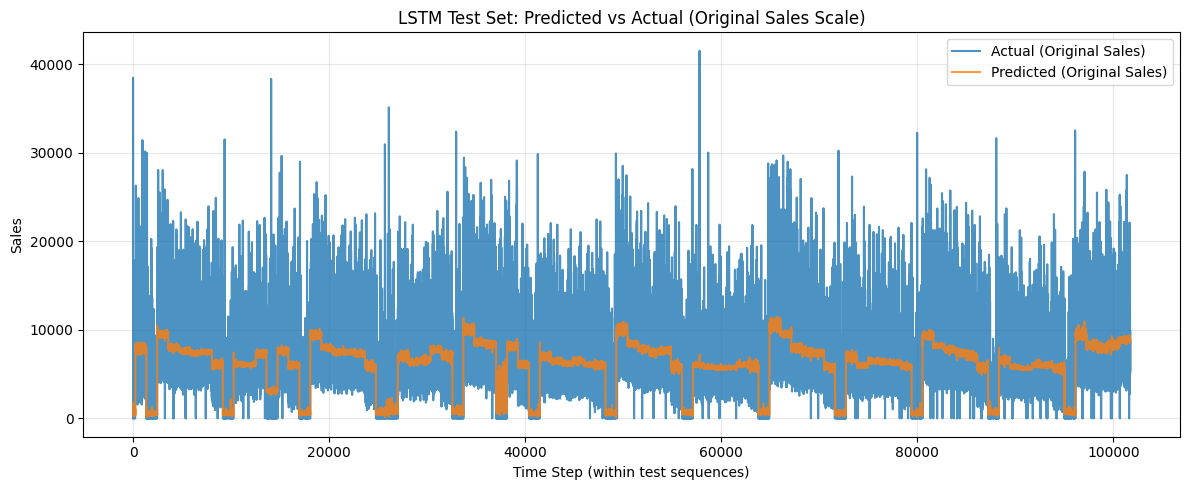

In [ ]:
# 0) Reproducibility + CPU-friendly TF config
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# 1) Ensure scaling exists (scale if missing)
# Assumes train / val / test are already created in your notebook.
required_scaled = all(name in globals() for name in ["train_scaled", "val_scaled", "test_scaled", "numerical_cols"])

if not required_scaled:
    print("Scaled splits not found. Scaling now...")
    numerical_cols = [
        'sales', 'customers', 'competition_distance',
        'days_since_competition', 'days_since_promo2', 'days_from_start',
        'sales_ma7', 'sales_ma30', 'sales_lag1', 'sales_lag7',
        'sales_std7', 'sales_to_ma7_ratio', 'sales_per_customer'
    ]
    numerical_cols = [c for c in numerical_cols if c in train.columns]

    scaler = StandardScaler()
    scaler.fit(train[numerical_cols])

    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    train_scaled[numerical_cols] = scaler.transform(train[numerical_cols])
    val_scaled[numerical_cols] = scaler.transform(val[numerical_cols])
    test_scaled[numerical_cols] = scaler.transform(test[numerical_cols])

# 2) Feature set (balanced speed/quality)
target_col = "sales"

candidate_features = [
    "sales",                # autoregressive signal
    "customers",
    "sales_lag1", "sales_lag7",
    "sales_ma7", "sales_ma30",
    "sales_std7",
    "sales_per_customer",
    "day_of_week", "day", "month",
    "days_from_start"
]
feature_cols = [c for c in candidate_features if c in train_scaled.columns]

if "date" not in train_scaled.columns:
    raise ValueError("Expected a 'date' column in train/val/test.")
if target_col not in train_scaled.columns:
    raise ValueError("Expected target column 'sales' in train/val/test.")
if len(feature_cols) == 0:
    raise ValueError("No feature columns found. Check your processed columns.")

print("Using features:", feature_cols)
print("Target:", target_col)

# 3) Sequence builder
def make_sequences(df, feature_cols, target_col, lookback=14):
    df = df.sort_values("date").reset_index(drop=True)

    Xv = df[feature_cols].astype(np.float32).values
    yv = df[target_col].astype(np.float32).values

    n = len(df)
    f = len(feature_cols)
    if n <= lookback:
        return np.empty((0, lookback, f), dtype=np.float32), np.empty((0,), dtype=np.float32)

    X = np.zeros((n - lookback, lookback, f), dtype=np.float32)
    y = np.zeros((n - lookback,), dtype=np.float32)

    for i in range(lookback, n):
        j = i - lookback
        X[j] = Xv[j:i]
        y[j] = yv[i]

    return X, y

# 4) Compact LSTM model (single layer, tuned units for CPU)
def build_lstm_model(input_shape, n_units=32, dropout=0.1, lr=1e-3):
    model = Sequential([
        LSTM(n_units, input_shape=input_shape),
        Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

# 5) Tuning subsets (bigger than <30min version, smaller than <1h version)
TRAIN_TUNE_ROWS = 100_000
VAL_TUNE_ROWS   = 40_000

train_tune = train_scaled.sort_values("date").tail(TRAIN_TUNE_ROWS).copy()
val_tune   = val_scaled.sort_values("date").tail(VAL_TUNE_ROWS).copy()

print(f"Train tune subset: {len(train_tune):,} rows")
print(f"Val tune subset:   {len(val_tune):,} rows")

# 6) Optuna objective (balanced search space)
def objective(trial):
    lookback = trial.suggest_categorical("lookback", [14, 21])
    n_units = trial.suggest_categorical("n_units", [32, 48])  # keep compact for CPU
    dropout = trial.suggest_float("dropout", 0.0, 0.25)
    lr = trial.suggest_float("lr", 5e-4, 2.5e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [256, 512])
    epochs = trial.suggest_int("epochs", 8, 16)

    X_train_t, y_train_t = make_sequences(train_tune, feature_cols, target_col, lookback=lookback)
    X_val_t, y_val_t     = make_sequences(val_tune, feature_cols, target_col, lookback=lookback)

    if len(X_train_t) == 0 or len(X_val_t) == 0:
        return float("inf")

    model = build_lstm_model(
        input_shape=(X_train_t.shape[1], X_train_t.shape[2]),
        n_units=n_units,
        dropout=dropout,
        lr=lr
    )

    callbacks = [
        EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True, verbose=0)
    ]
    if HAS_TF_PRUNING:
        callbacks.append(TFKerasPruningCallback(trial, "val_loss"))

    model.fit(
        X_train_t, y_train_t,
        validation_data=(X_val_t, y_val_t),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=0
    )

    val_pred = model.predict(X_val_t, batch_size=batch_size, verbose=0).ravel()
    return float(np.sqrt(mean_squared_error(y_val_t, val_pred)))

# 7) Run Optuna (balanced budget)
N_TRIALS = 5   # usually ~30-60 min total with settings below on mid-range CPU

pruner = optuna.pruners.MedianPruner(n_startup_trials=2, n_warmup_steps=2)
study = optuna.create_study(direction="minimize", pruner=pruner, study_name="balanced_lstm_cpu")

t0 = time.time()
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)
t_tune = time.time() - t0

print("\nBest trial:")
print("  Value (Val RMSE on tuning subset):", study.best_value)
print("  Params:", study.best_params)
print(f"Tuning time: {t_tune/60:.1f} min")

best_params = study.best_params
best_lookback = best_params["lookback"]

# 8) Final training data strategy (balanced)
# To stay in 30–60 min, use a large recent train subset by default.
# If your laptop is strong and timing looks good, set FINAL_TRAIN_ROWS = None for full 700k train.
FINAL_TRAIN_ROWS = 450_000   # balanced runtime/accuracy; set None for full train
FINAL_VAL_ROWS   = 120_000   # val monitoring subset (keeps early stopping representative)

train_final_df = train_scaled.sort_values("date").tail(FINAL_TRAIN_ROWS).copy() if FINAL_TRAIN_ROWS else train_scaled.sort_values("date").copy()
val_final_df   = val_scaled.sort_values("date").tail(FINAL_VAL_ROWS).copy() if FINAL_VAL_ROWS else val_scaled.sort_values("date").copy()
test_final_df  = test_scaled.sort_values("date").copy()  # full test

print("\nFinal training data used:")
print(f"train_final_df: {len(train_final_df):,} rows {'(subset)' if FINAL_TRAIN_ROWS else '(full train)'}")
print(f"val_final_df:   {len(val_final_df):,} rows {'(subset for monitoring)' if FINAL_VAL_ROWS else '(full val)'}")
print(f"test_final_df:  {len(test_final_df):,} rows (full test)")

# 9) Build final sequences
t_seq = time.time()
X_train, y_train = make_sequences(train_final_df, feature_cols, target_col, lookback=best_lookback)
X_val, y_val     = make_sequences(val_final_df, feature_cols, target_col, lookback=best_lookback)
X_test, y_test   = make_sequences(test_final_df, feature_cols, target_col, lookback=best_lookback)
t_seq_elapsed = time.time() - t_seq

print(f"\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")
print(f"Sequence build time: {t_seq_elapsed/60:.1f} min")

# 10) Final training (balanced)
final_model = build_lstm_model(
    input_shape=(X_train.shape[1], X_train.shape[2]),
    n_units=best_params["n_units"],
    dropout=best_params["dropout"],
    lr=best_params["lr"]
)

es_final = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)

# Allow a bit more training than <30 min version, but still cap tightly
final_epochs = min(best_params["epochs"] + 2, 14)

t_train = time.time()
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=final_epochs,
    batch_size=best_params["batch_size"],
    callbacks=[es_final],
    verbose=1
)
t_train_elapsed = time.time() - t_train
print(f"Final training time: {t_train_elapsed/60:.1f} min")

# 11) Test prediction (full test)
t_pred = time.time()
y_pred_test = final_model.predict(X_test, batch_size=best_params["batch_size"], verbose=0).ravel()
t_pred_elapsed = time.time() - t_pred
print(f"Test prediction time: {t_pred_elapsed/60:.1f} min")

# 12) Metrics
def regression_metrics(y_true, y_pred, prefix=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mask = np.abs(y_true) > 1e-8
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if mask.any() else np.nan
    return {
        f"{prefix}RMSE": rmse,
        f"{prefix}MAE": mae,
        f"{prefix}R2": r2,
        f"{prefix}MAPE_%": mape
    }

metrics_scaled = regression_metrics(y_test, y_pred_test, prefix="scaled_")

# Inverse-transform sales if possible
metrics_original = {}
y_test_original = None
y_pred_original = None

if "scaler" in globals() and ("sales" in numerical_cols):
    sales_idx = numerical_cols.index("sales")

    def inverse_sales(scaled_sales_array):
        tmp = np.zeros((len(scaled_sales_array), len(numerical_cols)), dtype=np.float32)
        tmp[:, sales_idx] = scaled_sales_array
        return scaler.inverse_transform(tmp)[:, sales_idx]

    y_test_original = inverse_sales(y_test)
    y_pred_original = inverse_sales(y_pred_test)
    metrics_original = regression_metrics(y_test_original, y_pred_original, prefix="orig_")

print("\n=== Test Metrics ===")
for k, v in {**metrics_scaled, **metrics_original}.items():
    print(f"{k}: {v:.4f}")

total_minutes = (t_tune + t_seq_elapsed + t_train_elapsed + t_pred_elapsed) / 60
print(f"\nEstimated total runtime (this cell): {total_minutes:.1f} min "
      f"(excluding first TF import/compile overhead and plotting render)")

# 13) Plot: Predicted vs Actual (test)
plt.figure(figsize=(12, 5))
if y_test_original is not None and y_pred_original is not None:
    plt.plot(y_test_original, label="Actual (Original Sales)", alpha=0.8)
    plt.plot(y_pred_original, label="Predicted (Original Sales)", alpha=0.8)
    plt.ylabel("Sales")
    plt.title("LSTM Test Set: Predicted vs Actual (Original Sales Scale)")
else:
    plt.plot(y_test, label="Actual (Scaled)", alpha=0.8)
    plt.plot(y_pred_test, label="Predicted (Scaled)", alpha=0.8)
    plt.ylabel("Scaled Sales")
    plt.title("LSTM Test Set: Predicted vs Actual (Scaled)")
plt.xlabel("Time Step (within test sequences)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### **Full dataset training for LSTM**

In [ ]:
# 0) Reproducibility + TF config
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# Optional: tune threads for your CPU if useful
# tf.config.threading.set_intra_op_parallelism_threads(4)
# tf.config.threading.set_inter_op_parallelism_threads(2)

# 1) Ensure train/val/test exist + scaling exists (scale if missing)
for _name in ["train", "val", "test"]:
    if _name not in globals():
        raise ValueError(f"Missing '{_name}' dataframe. Run your preprocessing/splitting cells first.")

required_scaled = all(name in globals() for name in ["train_scaled", "val_scaled", "test_scaled", "numerical_cols"])

if not required_scaled:
    print("Scaled splits not found. Scaling now...")
    numerical_cols = [
        'sales', 'customers', 'competition_distance',
        'days_since_competition', 'days_since_promo2', 'days_from_start',
        'sales_ma7', 'sales_ma30', 'sales_lag1', 'sales_lag7',
        'sales_std7', 'sales_to_ma7_ratio', 'sales_per_customer'
    ]
    numerical_cols = [c for c in numerical_cols if c in train.columns]

    if "sales" not in numerical_cols:
        raise ValueError("'sales' must be present for scaling/target.")

    # Clean train numeric for scaler fit
    train_num = train[numerical_cols].replace([np.inf, -np.inf], np.nan)
    scaler_fit_df = train_num.dropna(axis=0)
    if len(scaler_fit_df) == 0:
        raise ValueError("No valid rows available to fit scaler after removing NaN/Inf.")

    scaler = StandardScaler()
    scaler.fit(scaler_fit_df)

    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    # Transform with safe fill (using train means) to avoid transform errors
    fill_vals = pd.Series(scaler.mean_, index=numerical_cols)

    for src_df, dst_df, split_name in [
        (train, train_scaled, "train"),
        (val, val_scaled, "val"),
        (test, test_scaled, "test")
    ]:
        tmp = src_df[numerical_cols].replace([np.inf, -np.inf], np.nan).fillna(fill_vals)
        dst_df[numerical_cols] = scaler.transform(tmp)

# 2) Feature set (full/rich)
target_col = "sales"

candidate_features = [
    "sales", "customers",
    "competition_distance",
    "days_since_competition", "days_since_promo2", "days_from_start",
    "sales_ma7", "sales_ma30",
    "sales_lag1", "sales_lag7",
    "sales_std7",
    "sales_to_ma7_ratio", "sales_per_customer",
    "day_of_week", "day", "month"
]
feature_cols = [c for c in candidate_features if c in train_scaled.columns]

if "date" not in train_scaled.columns:
    raise ValueError("Expected a 'date' column in train/val/test.")
if target_col not in train_scaled.columns:
    raise ValueError("Expected target column 'sales' in train/val/test.")
if len(feature_cols) == 0:
    raise ValueError("No feature columns found. Check your processed columns.")

print("Using features:", feature_cols)
print("Target:", target_col)

# 3) Diagnostics (quick NaN/Inf check)
print("\nNaN/Inf quick check on selected columns (before sequence cleaning):")
for name, d in [("train_scaled", train_scaled), ("val_scaled", val_scaled), ("test_scaled", test_scaled)]:
    cols_chk = [c for c in feature_cols + [target_col] if c in d.columns]
    sub = d[cols_chk].replace([np.inf, -np.inf], np.nan)
    print(f"  {name}: rows={len(d):,}, total_NaNs={int(sub.isna().sum().sum()):,}")

# 4) Safe sequence builder (drops rows with NaN/Inf before creating sequences)
def make_sequences(df, feature_cols, target_col, lookback=30, verbose=False, split_name=""):
    df = df.sort_values("date").reset_index(drop=True).copy()

    cols_needed = feature_cols + [target_col]
    df_sub = df[cols_needed].copy().replace([np.inf, -np.inf], np.nan)

    before_rows = len(df_sub)
    df_sub = df_sub.dropna(axis=0)
    dropped = before_rows - len(df_sub)
    if verbose and dropped > 0:
        print(f"[{split_name}] Dropped {dropped:,} rows with NaN/Inf before sequence building.")

    Xv = df_sub[feature_cols].astype(np.float32).values
    yv = df_sub[target_col].astype(np.float32).values

    if not np.isfinite(Xv).all():
        raise ValueError(f"[{split_name}] Non-finite values remain in X after cleaning.")
    if not np.isfinite(yv).all():
        raise ValueError(f"[{split_name}] Non-finite values remain in y after cleaning.")

    n = len(df_sub)
    f = len(feature_cols)
    if n <= lookback:
        return np.empty((0, lookback, f), dtype=np.float32), np.empty((0,), dtype=np.float32)

    X = np.zeros((n - lookback, lookback, f), dtype=np.float32)
    y = np.zeros((n - lookback,), dtype=np.float32)

    for i in range(lookback, n):
        j = i - lookback
        X[j] = Xv[j:i]
        y[j] = yv[i]

    if not np.isfinite(X).all() or not np.isfinite(y).all():
        raise ValueError(f"[{split_name}] Non-finite values found in sequences.")

    return X, y

# 5) LSTM model builder (1-2 layers, gradient clipping for stability)
def build_lstm_model(input_shape, n_units=64, n_layers=1, dropout=0.2, lr=1e-3):
    model = Sequential()

    if n_layers == 1:
        model.add(LSTM(n_units, input_shape=input_shape))
        model.add(Dropout(dropout))
    else:
        model.add(LSTM(n_units, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout))
        model.add(LSTM(max(32, n_units // 2)))
        model.add(Dropout(dropout))

    model.add(Dense(1))

    optimizer = Adam(learning_rate=lr, clipnorm=1.0)  # gradient clipping improves stability
    model.compile(optimizer=optimizer, loss="mse")
    return model

# 6) Optuna tuning data (NO runtime limitation => full train/val by default)
# If you want faster tuning later, reduce these.
TRAIN_TUNE_ROWS = None   # None => full train
VAL_TUNE_ROWS   = None   # None => full val

train_tune = train_scaled.sort_values("date").copy() if TRAIN_TUNE_ROWS is None else train_scaled.sort_values("date").tail(TRAIN_TUNE_ROWS).copy()
val_tune   = val_scaled.sort_values("date").copy()   if VAL_TUNE_ROWS is None else val_scaled.sort_values("date").tail(VAL_TUNE_ROWS).copy()

print(f"\nTrain tune data: {len(train_tune):,} rows {'(full train)' if TRAIN_TUNE_ROWS is None else '(subset)'}")
print(f"Val tune data:   {len(val_tune):,} rows {'(full val)' if VAL_TUNE_ROWS is None else '(subset)'}")

# 7) Optuna objective (broader search; no runtime cap)
def objective(trial):
    lookback   = trial.suggest_categorical("lookback", [14, 21, 30, 45, 60])
    n_units    = trial.suggest_categorical("n_units", [32, 64, 96, 128])
    n_layers   = trial.suggest_int("n_layers", 1, 2)
    dropout    = trial.suggest_float("dropout", 0.0, 0.4)
    lr         = trial.suggest_float("lr", 2e-4, 1.5e-3, log=True)  # safer upper bound
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
    epochs     = trial.suggest_int("epochs", 12, 40)

    X_train_t, y_train_t = make_sequences(train_tune, feature_cols, target_col, lookback=lookback, verbose=False, split_name="train_tune")
    X_val_t, y_val_t     = make_sequences(val_tune, feature_cols, target_col, lookback=lookback, verbose=False, split_name="val_tune")

    if len(X_train_t) == 0 or len(X_val_t) == 0:
        return float("inf")

    model = build_lstm_model(
        input_shape=(X_train_t.shape[1], X_train_t.shape[2]),
        n_units=n_units,
        n_layers=n_layers,
        dropout=dropout,
        lr=lr
    )

    callbacks = [
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=0),
        TerminateOnNaN()
    ]
    if HAS_TF_PRUNING:
        callbacks.append(TFKerasPruningCallback(trial, "val_loss"))

    model.fit(
        X_train_t, y_train_t,
        validation_data=(X_val_t, y_val_t),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=0
    )

    val_pred = model.predict(X_val_t, batch_size=batch_size, verbose=0).ravel()

    if not np.isfinite(val_pred).all():
        return float("inf")

    return float(np.sqrt(mean_squared_error(y_val_t, val_pred)))

# 8) Run Optuna (NO runtime limitation)
# Increase N_TRIALS as much as you want.
N_TRIALS = 20  # no runtime cap; raise to 30/50/etc if you want deeper tuning

pruner = optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=3)
study = optuna.create_study(direction="minimize", pruner=pruner, study_name="full_lstm_no_runtime_limit")

t0 = time.time()
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)
t_tune = time.time() - t0

print("\nBest trial:")
print("  Value (Val RMSE):", study.best_value)
print("  Params:", study.best_params)
print(f"Tuning time: {t_tune/60:.1f} min")

best_params = study.best_params
best_lookback = best_params["lookback"]

# 9) Final train/val/test data (NO runtime limitation => full datasets)
FINAL_TRAIN_ROWS = None  # None => full train
FINAL_VAL_ROWS   = None  # None => full val
FINAL_TEST_ROWS  = None  # None => full test

train_final_df = train_scaled.sort_values("date").copy() if FINAL_TRAIN_ROWS is None else train_scaled.sort_values("date").tail(FINAL_TRAIN_ROWS).copy()
val_final_df   = val_scaled.sort_values("date").copy()   if FINAL_VAL_ROWS is None else val_scaled.sort_values("date").tail(FINAL_VAL_ROWS).copy()
test_final_df  = test_scaled.sort_values("date").copy()  if FINAL_TEST_ROWS is None else test_scaled.sort_values("date").tail(FINAL_TEST_ROWS).copy()

print("\nFinal data used:")
print(f"train_final_df: {len(train_final_df):,} rows {'(full train)' if FINAL_TRAIN_ROWS is None else '(subset)'}")
print(f"val_final_df:   {len(val_final_df):,} rows {'(full val)' if FINAL_VAL_ROWS is None else '(subset)'}")
print(f"test_final_df:  {len(test_final_df):,} rows {'(full test)' if FINAL_TEST_ROWS is None else '(subset)'}")

# 10) Build final sequences (safe)
t_seq = time.time()
X_train, y_train = make_sequences(train_final_df, feature_cols, target_col, lookback=best_lookback, verbose=True, split_name="train")
X_val, y_val     = make_sequences(val_final_df, feature_cols, target_col, lookback=best_lookback, verbose=True, split_name="val")
X_test, y_test   = make_sequences(test_final_df, feature_cols, target_col, lookback=best_lookback, verbose=True, split_name="test")
t_seq_elapsed = time.time() - t_seq

print(f"\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")
print(f"Sequence build time: {t_seq_elapsed/60:.1f} min")

for arr_name, arr in [("X_train", X_train), ("y_train", y_train), ("X_val", X_val), ("y_val", y_val), ("X_test", X_test), ("y_test", y_test)]:
    if not np.isfinite(arr).all():
        raise ValueError(f"{arr_name} contains non-finite values before final training/evaluation.")

# 11) Final training (NO runtime limitation => larger epoch budget)
final_model = build_lstm_model(
    input_shape=(X_train.shape[1], X_train.shape[2]),
    n_units=best_params["n_units"],
    n_layers=best_params["n_layers"],
    dropout=best_params["dropout"],
    lr=best_params["lr"]
)

es_final = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1)
nan_stop = TerminateOnNaN()

# No strict cap; allow more epochs than tuning suggestion
final_epochs = best_params["epochs"] + 10

t_train = time.time()
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=final_epochs,
    batch_size=best_params["batch_size"],
    callbacks=[es_final, nan_stop],
    verbose=1
)
t_train_elapsed = time.time() - t_train
print(f"Final training time: {t_train_elapsed/60:.1f} min")

# 12) Test prediction (safe)
t_pred = time.time()
y_pred_test = final_model.predict(X_test, batch_size=best_params["batch_size"], verbose=0).ravel()
t_pred_elapsed = time.time() - t_pred
print(f"Test prediction time: {t_pred_elapsed/60:.1f} min")

print(f"Prediction sanity check -> "
      f"y_test NaN:{int(np.isnan(y_test).sum())}, Inf:{int(np.isinf(y_test).sum())} | "
      f"y_pred NaN:{int(np.isnan(y_pred_test).sum())}, Inf:{int(np.isinf(y_pred_test).sum())}")

# 13) Robust metrics (filter invalid pairs instead of crashing)
def filter_finite_pairs(y_true, y_pred, name=""):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    removed = len(y_true) - int(mask.sum())
    if removed > 0:
        print(f"[{name}] Removed {removed:,} invalid pairs (NaN/Inf) before metrics.")
    if mask.sum() == 0:
        raise ValueError(f"[{name}] No valid prediction-target pairs remain for metrics.")
    return y_true[mask], y_pred[mask]

def regression_metrics(y_true, y_pred, prefix=""):
    y_true, y_pred = filter_finite_pairs(y_true, y_pred, name=prefix or "metrics")

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    nz = np.abs(y_true) > 1e-8
    mape = np.mean(np.abs((y_true[nz] - y_pred[nz]) / y_true[nz])) * 100 if nz.any() else np.nan

    return {
        f"{prefix}RMSE": rmse,
        f"{prefix}MAE": mae,
        f"{prefix}R2": r2,
        f"{prefix}MAPE_%": mape
    }

metrics_scaled = regression_metrics(y_test, y_pred_test, prefix="scaled_")

# 14) Inverse-transform sales safely (if possible)
metrics_original = {}
y_test_original = None
y_pred_original = None

if "scaler" in globals() and ("sales" in numerical_cols):
    sales_idx = numerical_cols.index("sales")

    def inverse_sales_safe(scaled_sales_array):
        arr = np.asarray(scaled_sales_array).ravel()
        out = np.full(arr.shape, np.nan, dtype=np.float32)

        finite_mask = np.isfinite(arr)
        if finite_mask.any():
            tmp = np.zeros((int(finite_mask.sum()), len(numerical_cols)), dtype=np.float32)
            tmp[:, sales_idx] = arr[finite_mask]
            out[finite_mask] = scaler.inverse_transform(tmp)[:, sales_idx]
        return out

    y_test_original = inverse_sales_safe(y_test)
    y_pred_original = inverse_sales_safe(y_pred_test)

    metrics_original = regression_metrics(y_test_original, y_pred_original, prefix="orig_")

print("\n=== Test Metrics ===")
for k, v in {**metrics_scaled, **metrics_original}.items():
    print(f"{k}: {v:.4f}")

total_minutes = (t_tune + t_seq_elapsed + t_train_elapsed + t_pred_elapsed) / 60
print(f"\nElapsed time (this run): {total_minutes:.1f} min "
      f"(excluding first-time TF import/compile overhead and plotting render)")

# 15) Plot: Predicted vs Actual (test)
plt.figure(figsize=(12, 5))

if y_test_original is not None and y_pred_original is not None:
    yt_plot, yp_plot = filter_finite_pairs(y_test_original, y_pred_original, name="plot_orig")
    plt.plot(yt_plot, label="Actual (Original Sales)", alpha=0.8)
    plt.plot(yp_plot, label="Predicted (Original Sales)", alpha=0.8)
    plt.ylabel("Sales")
    plt.title("LSTM Test Set: Predicted vs Actual (Original Sales Scale)")
else:
    yt_plot, yp_plot = filter_finite_pairs(y_test, y_pred_test, name="plot_scaled")
    plt.plot(yt_plot, label="Actual (Scaled)", alpha=0.8)
    plt.plot(yp_plot, label="Predicted (Scaled)", alpha=0.8)
    plt.ylabel("Scaled Sales")
    plt.title("LSTM Test Set: Predicted vs Actual (Scaled)")

plt.xlabel("Time Step (within test sequences)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### **TCN**

TensorFlow: 2.20.0


[I 2026-02-25 03:27:50,411] A new study created in memory with name: tcn_fast_lt30min


Target: sales
Using features: ['sales', 'customers', 'sales_lag1', 'sales_lag7', 'sales_ma7', 'sales_ma30', 'sales_std7', 'sales_per_customer', 'sales_to_ma7_ratio', 'day_of_week', 'day', 'month', 'days_from_start', 'competition_distance', 'days_since_competition', 'days_since_promo2']
Train tune subset: 80,000 rows
Val tune subset:   30,000 rows


Best trial: 0. Best value: 0.684225:  25%|██▌       | 1/4 [01:22<04:07, 82.42s/it]

[I 2026-02-25 03:29:12,831] Trial 0 finished with value: 0.6842253682543197 and parameters: {'lookback': 21, 'nb_filters': 32, 'kernel_size': 3, 'dilation_depth': 2, 'dropout_rate': 0.0718954869110503, 'lr': 0.0017211025529335713, 'epochs': 9}. Best is trial 0 with value: 0.6842253682543197.


Best trial: 0. Best value: 0.684225:  50%|█████     | 2/4 [02:05<01:58, 59.46s/it]

[I 2026-02-25 03:29:56,218] Trial 1 finished with value: 0.7764703262244936 and parameters: {'lookback': 21, 'nb_filters': 16, 'kernel_size': 3, 'dilation_depth': 2, 'dropout_rate': 0.013590172467183637, 'lr': 0.0015763197581027525, 'epochs': 6}. Best is trial 0 with value: 0.6842253682543197.


Best trial: 0. Best value: 0.684225:  75%|███████▌  | 3/4 [02:28<00:42, 42.52s/it]

[I 2026-02-25 03:30:18,581] Trial 2 pruned. Trial was pruned at epoch 2.


Best trial: 0. Best value: 0.684225: 100%|██████████| 4/4 [03:14<00:00, 48.65s/it]


[I 2026-02-25 03:31:05,010] Trial 3 pruned. Trial was pruned at epoch 5.

Best trial value (Val RMSE, SCALED): 0.6842253682543197
Best params: {'lookback': 21, 'nb_filters': 32, 'kernel_size': 3, 'dilation_depth': 2, 'dropout_rate': 0.0718954869110503, 'lr': 0.0017211025529335713, 'epochs': 9}
Tuning time: 3.2 min

Final data used (fast preset):
train_final_df: 180,000
val_final_df:   50,000
test_final_df:  40,000 (test subset)

Train sequences: 179,979
Val sequences:   49,979
X_test shape:    (39979, 21, 16), y_test shape: (39979,)
Dataset/sequence build time: 0.0 min
Epoch 1/11
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 2.3848 - val_loss: 0.6905
Epoch 2/11
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.5853 - val_loss: 0.6261
Epoch 3/11
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.5308 - val_loss: 0.5770
Epoch 4/11
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.5092 - val_loss: 0.5411
Epoch 5/11
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 0.5143 - v

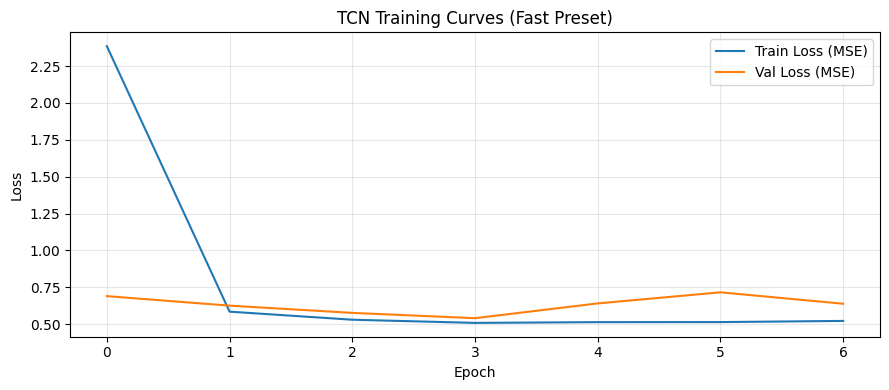

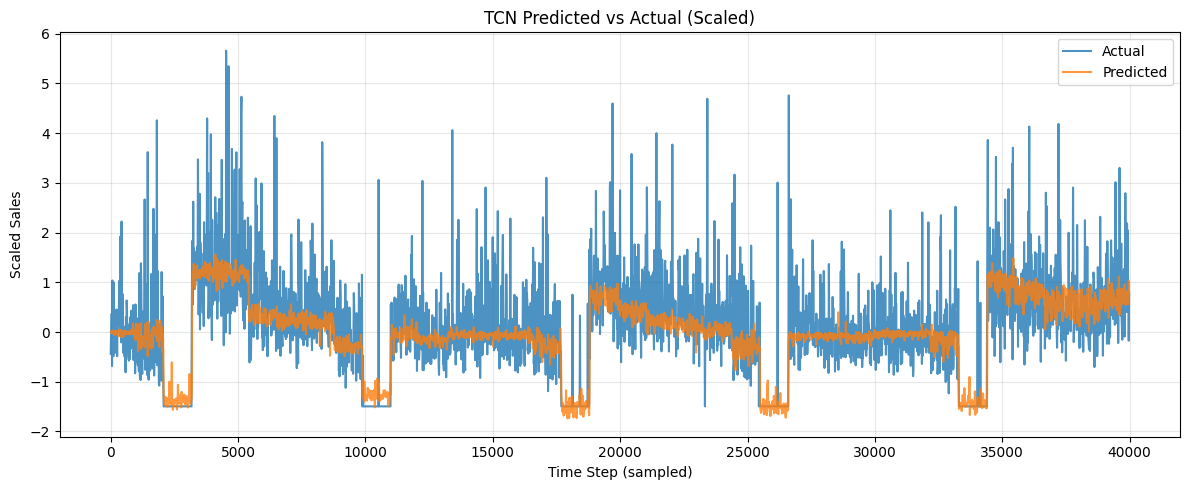

In [45]:
import sys, subprocess, importlib, os, time, random, warnings
warnings.filterwarnings("ignore")

def _ensure_pkg(import_name, pip_name=None):
    pip_name = pip_name or import_name
    try:
        importlib.import_module(import_name)
    except ModuleNotFoundError:
        print(f"Installing missing package: {pip_name}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pip_name])

# Core deps
_ensure_pkg("numpy")
_ensure_pkg("pandas")
_ensure_pkg("matplotlib")
_ensure_pkg("sklearn", "scikit-learn")
_ensure_pkg("optuna")
_ensure_pkg("tensorflow")

# TCN package
try:
    from tcn import TCN
except ModuleNotFoundError:
    _ensure_pkg("tcn", "keras-tcn")
    try:
        from tcn import TCN
    except ModuleNotFoundError:
        from tcn.tcn import TCN  # fallback

# Optional pruning callback
try:
    _ensure_pkg("optuna_integration", "optuna-integration[tfkeras]")
except Exception:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import optuna
try:
    from optuna.integration import TFKerasPruningCallback
    HAS_TF_PRUNING = True
except Exception:
    HAS_TF_PRUNING = False
    print("optuna-integration[tfkeras] not available -> continuing without pruning callback.")

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print("TensorFlow:", tf.__version__)

# -------------------------
# 1) Reproducibility + CPU speed settings
# -------------------------
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

try:
    tf.config.threading.set_intra_op_parallelism_threads(4)
    tf.config.threading.set_inter_op_parallelism_threads(2)
except Exception:
    pass

# -------------------------
# 2) Ensure train/val/test exist and scaling exists (scale if missing)
# -------------------------
for nm in ["train", "val", "test"]:
    if nm not in globals():
        raise ValueError(f"Expected DataFrame '{nm}' in notebook before running this cell.")

required_scaled = all(name in globals() for name in ["train_scaled", "val_scaled", "test_scaled", "numerical_cols"])

if not required_scaled:
    print("Scaled splits not found. Scaling now...")
    numerical_cols = [
        "sales", "customers", "competition_distance",
        "days_since_competition", "days_since_promo2", "days_from_start",
        "sales_ma7", "sales_ma30", "sales_lag1", "sales_lag7",
        "sales_std7", "sales_to_ma7_ratio", "sales_per_customer"
    ]
    numerical_cols = [c for c in numerical_cols if c in train.columns]

    if len(numerical_cols) == 0:
        raise ValueError("No numerical columns found for scaling. Check your processed columns.")

    scaler = StandardScaler()
    scaler.fit(train[numerical_cols])

    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    train_scaled[numerical_cols] = scaler.transform(train[numerical_cols])
    val_scaled[numerical_cols]   = scaler.transform(val[numerical_cols])
    test_scaled[numerical_cols]  = scaler.transform(test[numerical_cols])

# -------------------------
# 3) Feature set
# -------------------------
target_col = "sales"   # change if needed

candidate_features = [
    "sales", "customers",
    "sales_lag1", "sales_lag7",
    "sales_ma7", "sales_ma30",
    "sales_std7",
    "sales_per_customer",
    "sales_to_ma7_ratio",
    "day_of_week", "day", "month",
    "days_from_start",
    "competition_distance",
    "days_since_competition",
    "days_since_promo2"
]
feature_cols = [c for c in candidate_features if c in train_scaled.columns]

for nm in ["train_scaled", "val_scaled", "test_scaled"]:
    if "date" not in globals()[nm].columns:
        raise ValueError(f"{nm} must contain 'date'")
    if target_col not in globals()[nm].columns:
        raise ValueError(f"{nm} must contain target '{target_col}'")

if len(feature_cols) == 0:
    raise ValueError("No feature columns found. Check your processed columns.")

train_scaled = train_scaled.sort_values("date").reset_index(drop=True)
val_scaled   = val_scaled.sort_values("date").reset_index(drop=True)
test_scaled  = test_scaled.sort_values("date").reset_index(drop=True)

print("Target:", target_col)
print("Using features:", feature_cols)

# -------------------------
# 4) Utilities
# -------------------------
def make_xy_arrays(df, feature_cols, target_col):
    Xv = df[feature_cols].astype(np.float32).values
    yv = df[target_col].astype(np.float32).values
    return Xv, yv

def make_tsdataset_from_df(df, feature_cols, target_col, lookback, batch_size, shuffle=False):
    Xv, yv = make_xy_arrays(df, feature_cols, target_col)
    n = len(df)
    if n <= lookback:
        return None, 0

    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=Xv,
        targets=yv[lookback:],
        sequence_length=lookback,
        sequence_stride=1,
        sampling_rate=1,
        batch_size=batch_size,
        shuffle=shuffle,
        start_index=0,
        end_index=n - 2,
    )
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds, n - lookback

def make_numpy_sequences_for_eval(df, feature_cols, target_col, lookback):
    Xv, yv = make_xy_arrays(df, feature_cols, target_col)
    n = len(df)
    f = len(feature_cols)
    if n <= lookback:
        return np.empty((0, lookback, f), dtype=np.float32), np.empty((0,), dtype=np.float32)

    X = np.zeros((n - lookback, lookback, f), dtype=np.float32)
    y = yv[lookback:].copy()
    for i in range(n - lookback):
        X[i] = Xv[i:i + lookback]
    return X, y

def regression_metrics(y_true, y_pred, prefix=""):
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    r2   = float(r2_score(y_true, y_pred))

    mask = np.abs(y_true) > 1e-8
    mape = float(np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100) if mask.any() else np.nan

    denom = np.abs(y_true) + np.abs(y_pred)
    smask = denom > 1e-8
    smape = float(np.mean(2.0 * np.abs(y_pred[smask] - y_true[smask]) / denom[smask]) * 100) if smask.any() else np.nan

    return {
        f"{prefix}RMSE": rmse,
        f"{prefix}MAE": mae,
        f"{prefix}R2": r2,
        f"{prefix}MAPE_%": mape,
        f"{prefix}sMAPE_%": smape,
    }

# -------------------------
# 5) TCN model builder (version-compatible)
# -------------------------
def build_tcn_model(
    input_shape,
    nb_filters=32,
    kernel_size=3,
    dilations=(1, 2, 4),
    nb_stacks=1,
    dropout_rate=0.05,
    lr=1e-3,
):
    inp = Input(shape=input_shape)

    # IMPORTANT: no use_weight_norm here (not supported in your installed keras-tcn)
    x = TCN(
        nb_filters=nb_filters,
        kernel_size=kernel_size,
        dilations=list(dilations),
        nb_stacks=nb_stacks,
        padding="causal",
        use_skip_connections=True,
        dropout_rate=dropout_rate,
        return_sequences=False,
        activation="relu",
        use_batch_norm=False,
        use_layer_norm=False,
    )(inp)

    out = Dense(1)(x)
    model = Model(inp, out)
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
    return model

# -------------------------
# 6) FAST preset knobs (<30 min target)
# -------------------------
TRAIN_TUNE_ROWS = 80_000
VAL_TUNE_ROWS   = 30_000
N_TRIALS = 4

FINAL_TRAIN_ROWS = 180_000
FINAL_VAL_ROWS   = 50_000

USE_FULL_TEST = False          # set True if runtime allows
TEST_ROWS_IF_SUBSET = 40_000

PLOT_MAX_POINTS = 3000

# -------------------------
# 7) Tuning subsets
# -------------------------
train_tune = train_scaled.tail(TRAIN_TUNE_ROWS).copy()
val_tune   = val_scaled.tail(VAL_TUNE_ROWS).copy()

print(f"Train tune subset: {len(train_tune):,} rows")
print(f"Val tune subset:   {len(val_tune):,} rows")

# -------------------------
# 8) Optuna objective
# -------------------------
def objective(trial):
    lookback = trial.suggest_categorical("lookback", [14, 21])
    nb_filters = trial.suggest_categorical("nb_filters", [16, 32])
    kernel_size = trial.suggest_categorical("kernel_size", [2, 3])
    dilation_depth = trial.suggest_categorical("dilation_depth", [2, 3])  # [1,2] or [1,2,4]
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.15)
    lr = trial.suggest_float("lr", 5e-4, 2e-3, log=True)
    batch_size = 256
    epochs = trial.suggest_int("epochs", 6, 10)

    dilations = tuple([2 ** i for i in range(dilation_depth)])

    ds_train, _ = make_tsdataset_from_df(train_tune, feature_cols, target_col, lookback, batch_size, shuffle=False)
    ds_val, _   = make_tsdataset_from_df(val_tune, feature_cols, target_col, lookback, batch_size, shuffle=False)

    if ds_train is None or ds_val is None:
        return float("inf")

    model = build_tcn_model(
        input_shape=(lookback, len(feature_cols)),
        nb_filters=nb_filters,
        kernel_size=kernel_size,
        dilations=dilations,
        nb_stacks=1,
        dropout_rate=dropout_rate,
        lr=lr,
    )

    callbacks = [EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True, verbose=0)]
    if HAS_TF_PRUNING:
        callbacks.append(TFKerasPruningCallback(trial, "val_loss"))

    model.fit(
        ds_train,
        validation_data=ds_val,
        epochs=epochs,
        callbacks=callbacks,
        verbose=0
    )

    X_val_np, y_val_np = make_numpy_sequences_for_eval(val_tune, feature_cols, target_col, lookback)
    if len(X_val_np) == 0:
        tf.keras.backend.clear_session()
        return float("inf")

    y_val_pred = model.predict(X_val_np, batch_size=batch_size, verbose=0).ravel()
    val_rmse = float(np.sqrt(mean_squared_error(y_val_np, y_val_pred)))  # scaled RMSE
    tf.keras.backend.clear_session()
    return val_rmse

# -------------------------
# 9) Run Optuna
# -------------------------
pruner = optuna.pruners.MedianPruner(n_startup_trials=2, n_warmup_steps=1)
study = optuna.create_study(direction="minimize", pruner=pruner, study_name="tcn_fast_lt30min")

t0 = time.time()
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)
t_tune = time.time() - t0

print("\nBest trial value (Val RMSE, SCALED):", study.best_value)
print("Best params:", study.best_params)
print(f"Tuning time: {t_tune/60:.1f} min")

best_params = study.best_params
best_lookback = best_params["lookback"]
best_dilations = tuple([2 ** i for i in range(best_params["dilation_depth"])])

# -------------------------
# 10) Final subsets (speed preset)
# -------------------------
train_final_df = train_scaled.tail(FINAL_TRAIN_ROWS).copy()
val_final_df   = val_scaled.tail(FINAL_VAL_ROWS).copy()
test_final_df  = test_scaled.copy() if USE_FULL_TEST else test_scaled.tail(TEST_ROWS_IF_SUBSET).copy()

print("\nFinal data used (fast preset):")
print(f"train_final_df: {len(train_final_df):,}")
print(f"val_final_df:   {len(val_final_df):,}")
print(f"test_final_df:  {len(test_final_df):,} {'(full test)' if USE_FULL_TEST else '(test subset)'}")

# -------------------------
# 11) Build final datasets + test arrays
# -------------------------
FINAL_BATCH_SIZE = 256

t_seq = time.time()
train_ds, n_train_seq = make_tsdataset_from_df(train_final_df, feature_cols, target_col, best_lookback, FINAL_BATCH_SIZE, shuffle=False)
val_ds, n_val_seq     = make_tsdataset_from_df(val_final_df, feature_cols, target_col, best_lookback, FINAL_BATCH_SIZE, shuffle=False)
X_test, y_test        = make_numpy_sequences_for_eval(test_final_df, feature_cols, target_col, best_lookback)
t_seq_elapsed = time.time() - t_seq

if train_ds is None or val_ds is None or len(X_test) == 0:
    raise ValueError("Sequence generation is empty. Check lookback and subset sizes.")

print(f"\nTrain sequences: {n_train_seq:,}")
print(f"Val sequences:   {n_val_seq:,}")
print(f"X_test shape:    {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Dataset/sequence build time: {t_seq_elapsed/60:.1f} min")

# -------------------------
# 12) Final training
# -------------------------
final_model = build_tcn_model(
    input_shape=(best_lookback, len(feature_cols)),
    nb_filters=best_params["nb_filters"],
    kernel_size=best_params["kernel_size"],
    dilations=best_dilations,
    nb_stacks=1,
    dropout_rate=best_params["dropout_rate"],
    lr=best_params["lr"],
)

es_final = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)
final_epochs = min(best_params["epochs"] + 2, 12)

t_train = time.time()
history = final_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=final_epochs,
    callbacks=[es_final],
    verbose=1
)
t_train_elapsed = time.time() - t_train
print(f"Final training time: {t_train_elapsed/60:.1f} min")

# -------------------------
# 13) Test prediction
# -------------------------
t_pred = time.time()
y_pred_test = final_model.predict(X_test, batch_size=FINAL_BATCH_SIZE, verbose=0).ravel()
t_pred_elapsed = time.time() - t_pred
print(f"Test prediction time: {t_pred_elapsed/60:.1f} min")

# -------------------------
# 14) Metrics (PRIMARY REPORTING = SCALED)
# -------------------------
metrics_scaled = regression_metrics(y_test, y_pred_test, prefix="scaled_")

print("\n=== Test Metrics (SCALED) ===")
for k, v in metrics_scaled.items():
    print(f"{k}: {v:.4f}")

# Primary required output
print(f"\n>>> TEST RMSE (SCALED): {metrics_scaled['scaled_RMSE']:.4f}")

# Optional original-scale metrics (computed but NOT primary)
metrics_original = {}
y_test_original = None
y_pred_original = None
if ("scaler" in globals()) and ("numerical_cols" in globals()) and ("sales" in numerical_cols):
    try:
        sales_idx = numerical_cols.index("sales")

        def inverse_sales(arr):
            tmp = np.zeros((len(arr), len(numerical_cols)), dtype=np.float32)
            tmp[:, sales_idx] = arr.astype(np.float32)
            return scaler.inverse_transform(tmp)[:, sales_idx]

        y_test_original = inverse_sales(y_test)
        y_pred_original = inverse_sales(y_pred_test)
        metrics_original = regression_metrics(y_test_original, y_pred_original, prefix="orig_")

        print("\n(Optional) Original-scale metrics:")
        print(f"orig_RMSE: {metrics_original['orig_RMSE']:.4f}")
        print(f"orig_MAE:  {metrics_original['orig_MAE']:.4f}")
        print(f"orig_R2:   {metrics_original['orig_R2']:.4f}")
    except Exception as e:
        print(f"\nCould not compute original-scale metrics (this does NOT affect scaled RMSE reporting): {e}")

total_minutes = (t_tune + t_seq_elapsed + t_train_elapsed + t_pred_elapsed) / 60
print(f"\nEstimated runtime: {total_minutes:.1f} min (excluding import/compile overhead and plotting)")

# -------------------------
# 15) Plots (use SCALED by default to match reported RMSE)
# -------------------------
# Training curves
plt.figure(figsize=(9, 4))
plt.plot(history.history.get("loss", []), label="Train Loss (MSE)")
if "val_loss" in history.history:
    plt.plot(history.history["val_loss"], label="Val Loss (MSE)")
plt.title("TCN Training Curves (Fast Preset)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Predicted vs actual line plot (SCALED)
y_true_plot = y_test
y_pred_plot = y_pred_test
y_label = "Scaled Sales"
title = "TCN Predicted vs Actual (Scaled)"

n = len(y_true_plot)
idx = np.linspace(0, n - 1, min(PLOT_MAX_POINTS, n), dtype=int)

plt.figure(figsize=(12, 5))
plt.plot(idx, y_true_plot[idx], label="Actual", alpha=0.8)
plt.plot(idx, y_pred_plot[idx], label="Predicted", alpha=0.8)
plt.title(title)
plt.xlabel("Time Step (sampled)")
plt.ylabel(y_label)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



**TCN WITH NO RUN-TIME LIMITATION**

In [ ]:


import sys, subprocess, importlib, os, time, random, warnings
warnings.filterwarnings("ignore")

def _ensure_pkg(import_name, pip_name=None):
    pip_name = pip_name or import_name
    try:
        importlib.import_module(import_name)
    except ModuleNotFoundError:
        print(f"Installing missing package: {pip_name}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pip_name])

# Core deps
_ensure_pkg("numpy")
_ensure_pkg("pandas")
_ensure_pkg("matplotlib")
_ensure_pkg("sklearn", "scikit-learn")
_ensure_pkg("optuna")
_ensure_pkg("tensorflow")

# TCN package
try:
    from tcn import TCN
except ModuleNotFoundError:
    _ensure_pkg("tcn", "keras-tcn")
    try:
        from tcn import TCN
    except ModuleNotFoundError:
        from tcn.tcn import TCN

# Optional pruning callback
try:
    _ensure_pkg("optuna_integration", "optuna-integration[tfkeras]")
except Exception:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import optuna
try:
    from optuna.integration import TFKerasPruningCallback
    HAS_TF_PRUNING = True
except Exception:
    HAS_TF_PRUNING = False
    print("optuna-integration[tfkeras] not available -> continuing without pruning callback.")

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print("TensorFlow:", tf.__version__)

# -------------------------
# 1) Reproducibility + CPU settings
# -------------------------
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Optional thread tuning (uncomment if you want manual control)
# try:
#     tf.config.threading.set_intra_op_parallelism_threads(4)
#     tf.config.threading.set_inter_op_parallelism_threads(2)
# except Exception:
#     pass

# -------------------------
# 2) Ensure train/val/test exist and scaling exists (scale if missing)
# -------------------------
for nm in ["train", "val", "test"]:
    if nm not in globals():
        raise ValueError(f"Expected DataFrame '{nm}' in notebook before running this cell.")

required_scaled = all(name in globals() for name in ["train_scaled", "val_scaled", "test_scaled", "numerical_cols"])

if not required_scaled:
    print("Scaled splits not found. Scaling now...")
    numerical_cols = [
        "sales", "customers", "competition_distance",
        "days_since_competition", "days_since_promo2", "days_from_start",
        "sales_ma7", "sales_ma30", "sales_lag1", "sales_lag7",
        "sales_std7", "sales_to_ma7_ratio", "sales_per_customer"
    ]
    numerical_cols = [c for c in numerical_cols if c in train.columns]

    if len(numerical_cols) == 0:
        raise ValueError("No numerical columns found for scaling. Check your processed columns.")

    scaler = StandardScaler()
    scaler.fit(train[numerical_cols])

    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    train_scaled[numerical_cols] = scaler.transform(train[numerical_cols])
    val_scaled[numerical_cols]   = scaler.transform(val[numerical_cols])
    test_scaled[numerical_cols]  = scaler.transform(test[numerical_cols])

# -------------------------
# 3) Feature set
# -------------------------
target_col = "sales"   # change if needed

candidate_features = [
    "sales", "customers",
    "sales_lag1", "sales_lag7",
    "sales_ma7", "sales_ma30",
    "sales_std7",
    "sales_per_customer",
    "sales_to_ma7_ratio",
    "day_of_week", "day", "month",
    "days_from_start",
    "competition_distance",
    "days_since_competition",
    "days_since_promo2"
]
feature_cols = [c for c in candidate_features if c in train_scaled.columns]

for nm in ["train_scaled", "val_scaled", "test_scaled"]:
    if "date" not in globals()[nm].columns:
        raise ValueError(f"{nm} must contain 'date'")
    if target_col not in globals()[nm].columns:
        raise ValueError(f"{nm} must contain target '{target_col}'")

if len(feature_cols) == 0:
    raise ValueError("No feature columns found. Check your processed columns.")

train_scaled = train_scaled.sort_values("date").reset_index(drop=True)
val_scaled   = val_scaled.sort_values("date").reset_index(drop=True)
test_scaled  = test_scaled.sort_values("date").reset_index(drop=True)

print("Target:", target_col)
print("Using features:", feature_cols)

# -------------------------
# 4) Utilities
# -------------------------
def make_xy_arrays(df, feature_cols, target_col):
    Xv = df[feature_cols].astype(np.float32).values
    yv = df[target_col].astype(np.float32).values
    return Xv, yv

def make_tsdataset_from_df(df, feature_cols, target_col, lookback, batch_size, shuffle=False):
    Xv, yv = make_xy_arrays(df, feature_cols, target_col)
    n = len(df)
    if n <= lookback:
        return None, 0

    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=Xv,
        targets=yv[lookback:],
        sequence_length=lookback,
        sequence_stride=1,
        sampling_rate=1,
        batch_size=batch_size,
        shuffle=shuffle,
        start_index=0,
        end_index=n - 2,
    )
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds, n - lookback

def make_numpy_sequences_for_eval(df, feature_cols, target_col, lookback):
    Xv, yv = make_xy_arrays(df, feature_cols, target_col)
    n = len(df)
    f = len(feature_cols)
    if n <= lookback:
        return np.empty((0, lookback, f), dtype=np.float32), np.empty((0,), dtype=np.float32)

    X = np.zeros((n - lookback, lookback, f), dtype=np.float32)
    y = yv[lookback:].copy()
    for i in range(n - lookback):
        X[i] = Xv[i:i + lookback]
    return X, y

def regression_metrics(y_true, y_pred, prefix=""):
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    r2   = float(r2_score(y_true, y_pred))

    mask = np.abs(y_true) > 1e-8
    mape = float(np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100) if mask.any() else np.nan

    denom = np.abs(y_true) + np.abs(y_pred)
    smask = denom > 1e-8
    smape = float(np.mean(2.0 * np.abs(y_pred[smask] - y_true[smask]) / denom[smask]) * 100) if smask.any() else np.nan

    return {
        f"{prefix}RMSE": rmse,
        f"{prefix}MAE": mae,
        f"{prefix}R2": r2,
        f"{prefix}MAPE_%": mape,
        f"{prefix}sMAPE_%": smape,
    }

# -------------------------
# 5) TCN model builder (version-compatible)
# -------------------------
def build_tcn_model(
    input_shape,
    nb_filters=64,
    kernel_size=3,
    dilations=(1, 2, 4, 8),
    nb_stacks=1,
    dropout_rate=0.1,
    lr=1e-3,
    use_batch_norm=False,
    use_layer_norm=False,
):
    inp = Input(shape=input_shape)

    # NOTE: no use_weight_norm (unsupported in some keras-tcn versions)
    x = TCN(
        nb_filters=nb_filters,
        kernel_size=kernel_size,
        dilations=list(dilations),
        nb_stacks=nb_stacks,
        padding="causal",
        use_skip_connections=True,
        dropout_rate=dropout_rate,
        return_sequences=False,
        activation="relu",
        use_batch_norm=use_batch_norm,
        use_layer_norm=use_layer_norm,
    )(inp)

    out = Dense(1)(x)
    model = Model(inp, out)
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

# -------------------------
# 6) NO-RUNTIME-LIMIT SETTINGS
# -------------------------
# Use full splits by default for tuning and final training/evaluation
# (You can still reduce if memory becomes an issue.)
TRAIN_TUNE_ROWS = None   # None => full train
VAL_TUNE_ROWS   = None   # None => full val
N_TRIALS = 25           # Increase further (e.g., 40-80) if you want more exhaustive tuning

FINAL_TRAIN_ROWS = None # None => full train
FINAL_VAL_ROWS   = None # None => full val
USE_FULL_TEST    = True # full test
TEST_ROWS_IF_SUBSET = None

# Optuna timeout disabled
OPTUNA_TIMEOUT_SECONDS = None

# Plotting
PLOT_MAX_POINTS = 8000

# -------------------------
# 7) Build tuning subsets (full by default)
# -------------------------
train_tune = train_scaled.copy() if TRAIN_TUNE_ROWS is None else train_scaled.tail(TRAIN_TUNE_ROWS).copy()
val_tune   = val_scaled.copy()   if VAL_TUNE_ROWS is None else val_scaled.tail(VAL_TUNE_ROWS).copy()

print(f"Train tune subset: {len(train_tune):,} rows {'(full train)' if TRAIN_TUNE_ROWS is None else ''}")
print(f"Val tune subset:   {len(val_tune):,} rows {'(full val)' if VAL_TUNE_ROWS is None else ''}")

# -------------------------
# 8) Optuna objective (expanded search space)
# -------------------------
def objective(trial):
    lookback = trial.suggest_categorical("lookback", [14, 21, 30, 45])

    nb_filters = trial.suggest_categorical("nb_filters", [32, 64, 96, 128])
    kernel_size = trial.suggest_categorical("kernel_size", [2, 3, 5, 7])
    dilation_depth = trial.suggest_categorical("dilation_depth", [2, 3, 4, 5])  # [1,2] ... [1,2,4,8,16]
    nb_stacks = trial.suggest_categorical("nb_stacks", [1, 2])
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.30)
    use_batch_norm = trial.suggest_categorical("use_batch_norm", [False, True])
    use_layer_norm = trial.suggest_categorical("use_layer_norm", [False, True])

    lr = trial.suggest_float("lr", 1e-4, 3e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])
    epochs = trial.suggest_int("epochs", 12, 40)

    dilations = tuple([2 ** i for i in range(dilation_depth)])

    ds_train, _ = make_tsdataset_from_df(train_tune, feature_cols, target_col, lookback, batch_size, shuffle=False)
    ds_val, _   = make_tsdataset_from_df(val_tune, feature_cols, target_col, lookback, batch_size, shuffle=False)

    if ds_train is None or ds_val is None:
        return float("inf")

    model = build_tcn_model(
        input_shape=(lookback, len(feature_cols)),
        nb_filters=nb_filters,
        kernel_size=kernel_size,
        dilations=dilations,
        nb_stacks=nb_stacks,
        dropout_rate=dropout_rate,
        lr=lr,
        use_batch_norm=use_batch_norm,
        use_layer_norm=use_layer_norm,
    )

    callbacks = [
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=0)
    ]
    if HAS_TF_PRUNING:
        callbacks.append(TFKerasPruningCallback(trial, "val_loss"))

    model.fit(
        ds_train,
        validation_data=ds_val,
        epochs=epochs,
        callbacks=callbacks,
        verbose=0
    )

    # Validation RMSE in scaled space (objective)
    X_val_np, y_val_np = make_numpy_sequences_for_eval(val_tune, feature_cols, target_col, lookback)
    if len(X_val_np) == 0:
        tf.keras.backend.clear_session()
        return float("inf")

    y_val_pred = model.predict(X_val_np, batch_size=batch_size, verbose=0).ravel()
    val_rmse_scaled = float(np.sqrt(mean_squared_error(y_val_np, y_val_pred)))

    tf.keras.backend.clear_session()
    return val_rmse_scaled

# -------------------------
# 9) Run Optuna (no runtime limit)
# -------------------------
# TPESampler gives better search than default random in many cases
sampler = optuna.samplers.TPESampler(seed=SEED, multivariate=True)
pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=3)

study = optuna.create_study(
    direction="minimize",
    sampler=sampler,
    pruner=pruner,
    study_name="tcn_no_runtime_limit_scaled_rmse"
)

t0 = time.time()
study.optimize(
    objective,
    n_trials=N_TRIALS,
    timeout=OPTUNA_TIMEOUT_SECONDS,   # None => no time limit
    show_progress_bar=True
)
t_tune = time.time() - t0

print("\nBest trial value (Val RMSE, SCALED):", study.best_value)
print("Best params:", study.best_params)
print(f"Tuning time: {t_tune/60:.1f} min")

best_params = study.best_params
best_lookback = best_params["lookback"]
best_dilations = tuple([2 ** i for i in range(best_params["dilation_depth"])])

# -------------------------
# 10) Final data (full by default)
# -------------------------
train_final_df = train_scaled.copy() if FINAL_TRAIN_ROWS is None else train_scaled.tail(FINAL_TRAIN_ROWS).copy()
val_final_df   = val_scaled.copy()   if FINAL_VAL_ROWS is None else val_scaled.tail(FINAL_VAL_ROWS).copy()
test_final_df  = test_scaled.copy()  if USE_FULL_TEST else test_scaled.tail(TEST_ROWS_IF_SUBSET).copy()

print("\nFinal data used:")
print(f"train_final_df: {len(train_final_df):,} rows {'(full train)' if FINAL_TRAIN_ROWS is None else ''}")
print(f"val_final_df:   {len(val_final_df):,} rows {'(full val)' if FINAL_VAL_ROWS is None else ''}")
print(f"test_final_df:  {len(test_final_df):,} rows {'(full test)' if USE_FULL_TEST else ''}")

# -------------------------
# 11) Build final datasets + test arrays
# -------------------------
FINAL_BATCH_SIZE = best_params["batch_size"]

t_seq = time.time()
train_ds, n_train_seq = make_tsdataset_from_df(train_final_df, feature_cols, target_col, best_lookback, FINAL_BATCH_SIZE, shuffle=False)
val_ds, n_val_seq     = make_tsdataset_from_df(val_final_df, feature_cols, target_col, best_lookback, FINAL_BATCH_SIZE, shuffle=False)
X_test, y_test        = make_numpy_sequences_for_eval(test_final_df, feature_cols, target_col, best_lookback)
t_seq_elapsed = time.time() - t_seq

if train_ds is None or val_ds is None or len(X_test) == 0:
    raise ValueError("Sequence generation is empty. Check lookback and split sizes.")

print(f"\nTrain sequences: {n_train_seq:,}")
print(f"Val sequences:   {n_val_seq:,}")
print(f"X_test shape:    {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Dataset/sequence build time: {t_seq_elapsed/60:.1f} min")

# -------------------------
# 12) Final training (no strict cap)
# -------------------------
final_model = build_tcn_model(
    input_shape=(best_lookback, len(feature_cols)),
    nb_filters=best_params["nb_filters"],
    kernel_size=best_params["kernel_size"],
    dilations=best_dilations,
    nb_stacks=best_params["nb_stacks"],
    dropout_rate=best_params["dropout_rate"],
    lr=best_params["lr"],
    use_batch_norm=best_params["use_batch_norm"],
    use_layer_norm=best_params["use_layer_norm"],
)

es_final = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1)
# No short-runtime cap; allow more epochs than tuned value for refinement
final_epochs = best_params["epochs"] + 15

t_train = time.time()
history = final_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=final_epochs,
    callbacks=[es_final],
    verbose=1
)
t_train_elapsed = time.time() - t_train
print(f"Final training time: {t_train_elapsed/60:.1f} min")

# -------------------------
# 13) Test prediction
# -------------------------
t_pred = time.time()
y_pred_test = final_model.predict(X_test, batch_size=FINAL_BATCH_SIZE, verbose=0).ravel()
t_pred_elapsed = time.time() - t_pred
print(f"Test prediction time: {t_pred_elapsed/60:.1f} min")

# -------------------------
# 14) Metrics (PRIMARY = SCALED)
# -------------------------
metrics_scaled = regression_metrics(y_test, y_pred_test, prefix="scaled_")

print("\n=== Test Metrics (SCALED) ===")
for k, v in metrics_scaled.items():
    print(f"{k}: {v:.4f}")

print(f"\n>>> TEST RMSE (SCALED): {metrics_scaled['scaled_RMSE']:.4f}")

# Optional original-scale metrics (secondary)
metrics_original = {}
y_test_original = None
y_pred_original = None

if ("scaler" in globals()) and ("numerical_cols" in globals()) and ("sales" in numerical_cols):
    try:
        sales_idx = numerical_cols.index("sales")

        def inverse_sales(arr):
            tmp = np.zeros((len(arr), len(numerical_cols)), dtype=np.float32)
            tmp[:, sales_idx] = arr.astype(np.float32)
            return scaler.inverse_transform(tmp)[:, sales_idx]

        y_test_original = inverse_sales(y_test)
        y_pred_original = inverse_sales(y_pred_test)
        metrics_original = regression_metrics(y_test_original, y_pred_original, prefix="orig_")

        print("\n(Optional) Original-scale metrics:")
        for k, v in metrics_original.items():
            print(f"{k}: {v:.4f}")
    except Exception as e:
        print(f"\nCould not compute original-scale metrics (scaled metrics are unaffected): {e}")

total_minutes = (t_tune + t_seq_elapsed + t_train_elapsed + t_pred_elapsed) / 60
print(f"\nTotal runtime (observed): {total_minutes:.1f} min")

# -------------------------
# 15) Plots (scaled by default)
# -------------------------
# Training curves
plt.figure(figsize=(10, 4))
plt.plot(history.history.get("loss", []), label="Train Loss (MSE)")
if "val_loss" in history.history:
    plt.plot(history.history["val_loss"], label="Val Loss (MSE)")
if "rmse" in history.history:
    plt.plot(history.history["rmse"], label="Train RMSE")
if "val_rmse" in history.history:
    plt.plot(history.history["val_rmse"], label="Val RMSE")
plt.title("TCN Training Curves")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Predicted vs actual line plot (scaled)
y_true_plot = y_test
y_pred_plot = y_pred_test
n = len(y_true_plot)
idx = np.linspace(0, n - 1, min(PLOT_MAX_POINTS, n), dtype=int)

plt.figure(figsize=(12, 5))
plt.plot(idx, y_true_plot[idx], label="Actual", alpha=0.8)
plt.plot(idx, y_pred_plot[idx], label="Predicted", alpha=0.8)
plt.title("TCN Predicted vs Actual (Scaled)")
plt.xlabel("Time Step (sampled)")
plt.ylabel("Scaled Sales")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

